<a href="https://colab.research.google.com/github/Devanshu0502/EUI-Prediction/blob/main/EUI_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install scikit_learn==1.1.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
pip install category-encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
pip install optuna

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# <span style="font-family:cursive;text-align:center">⬇️ Import Libraries</span>

In [6]:
import numpy as np
import pandas as pd


import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns


# from sklearn.base import BaseEstimator, TransformerMixin
# 
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
from category_encoders import TargetEncoder

from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Ridge, Lasso, RANSACRegressor

from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error

from catboost import CatBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor



import optuna


import tqdm
import joblib
import pickle
# serializd your object and svaes its binary form 

import shap


pd.set_option('display.max_columns', 70)
plt.rcParams['axes.spines.top']=False
plt.rcParams['axes.spines.right']=False

style.use('ggplot')
sns.set_palette('Set2')
# blue, orange, green

import warnings
warnings.filterwarnings('ignore')

# <span style="font-family:cursive;text-align:center">⬇️ Import Data</span>

In [7]:
train = pd.read_csv('/content/drive/MyDrive/Projects/EUI Prediction/train_dataset.csv')
test = pd.read_csv('/content/drive/MyDrive/Projects/EUI Prediction/x_test.csv')

In [8]:
df_train = train.copy()
df_test = test.copy()

In [9]:
print(df_train.shape)
print(df_test.shape)

(75757, 64)
(9705, 63)


In [10]:
train

Year_Factor State_Factor building_class  \
0                1      State_1     Commercial   
1                1      State_1     Commercial   
2                1      State_1     Commercial   
3                1      State_1     Commercial   
4                1      State_1     Commercial   
...            ...          ...            ...   
75752            6     State_11     Commercial   
75753            6     State_11    Residential   
75754            6     State_11     Commercial   
75755            6     State_11     Commercial   
75756            6     State_11    Residential   

                                   facility_type  floor_area  year_built  \
0                   Grocery_store_or_food_market     61242.0      1942.0   
1      Warehouse_Distribution_or_Shipping_center    274000.0      1955.0   
2                           Retail_Enclosed_mall    280025.0      1951.0   
3                      Education_Other_classroom     55325.0      1980.0   
4                      Warehouse_Nonrefrigerated     66000.0      1985.0   
...                                          ...         ...         ...   
75752                       Office_Uncategorized     20410.0      1995.0   
75753                        5plus_Unit_Building     40489.0      1910.0   
75754                           Commercial_Other     28072.0      1917.0   
75755                           Commercial_Other     53575.0      2012.0   
75756                         2to4_Unit_Building     23888.0      1974.0   

       energy_star_rating  ELEVATION  january_min_temp  january_avg_temp  \
0                    11.0        2.4                36         50.500000   
1                    45.0        1.8                36         50.500000   
2                    97.0        1.8                36         50.500000   
3                    46.0        1.8                36         50.500000   
4                   100.0        2.4                36         50.500000   
...                   ...        ...               ...               ...   
75752                 8.0       36.6                28         43.451613   
75753                98.0       36.6                28         43.451613   
75754                 NaN       36.6                26         36.612903   
75755                 NaN       36.6                26         36.612903   
75756                51.0       36.6                27         36.935484   

       january_max_temp  february_min_temp  february_avg_temp  \
0                    68                 35          50.589286   
1                    68                 35          50.589286   
2                    68                 35          50.589286   
3                    68                 35          50.589286   
4                    68                 35          50.589286   
...                 ...                ...                ...   
75752                56                 34          47.672414   
75753                56                 34          47.672414   
75754                48                 30          41.637931   
75755                48                 30          41.637931   
75756                51                 29          42.172414   

       february_max_temp  march_min_temp  march_avg_temp  march_max_temp  \
0                     73              40       53.693548              80   
1                     73              40       53.693548              80   
2                     73              40       53.693548              80   
3                     73              40       53.693548              80   
4                     73              40       53.693548              80   
...                  ...             ...             ...             ...   
75752                 64              35       49.354839              71   
75753                 64              35       49.354839              71   
75754                 58              29       41.338710              62   
75755                 58              2

In [11]:
df_train.rename(columns={
    'Year_Factor': 'year_factor', 
    'State_Factor': 'state_factor',
    'ELEVATION': 'elevation',
    'id': 'building_id'
}, inplace=True)

df_test.rename(columns={
    'Year_Factor': 'year_factor', 
    'State_Factor': 'state_factor',
    'ELEVATION': 'elevation',
    'id': 'building_id'
}, inplace=True)

# df.columns = df.columns.values.lower()

# <span style="font-family:cursive;text-align:center">📊 Exploratory Data Analysis</span>

<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">
    <font size='5pt'><b>Understanding features:</b></font>

year_Factor: anonymized year in which the weather and energy usage factors were observed  

state_Factor: anonymized state in which the building is located  

building_class: building classification  

facility_type: building usage type  

floor_area: floor area (in square feet) of the building  

year_built: year in which the building was constructed  

energy_star_rating: the energy star rating of the building  

elevation: elevation of the building location  

january_min_temp: minimum temperature in January (in Fahrenheit) at the location of the building  

january_avg_temp: average temperature in January (in Fahrenheit) at the location of the building  

january_max_temp: maximum temperature in January (in Fahrenheit) at the location of the building  

[Similarly for all other months]

cooling_degree_days: cooling degree day for a given day is the number of degrees where the daily average temperature   
exceeds 65 degrees Fahrenheit. Each month is summed to produce an annual total at the location of the building.  

heating_degree_days: heating degree day for a given day is the number of degrees where the daily average temperature   falls under 65 degrees Fahrenheit. Each month is summed to produce an annual total at the location of the building.  

precipitation_inches: annual precipitation in inches at the location of the building  

snowfall_inches: annual snowfall in inches at the location of the building  

snowdepth_inches: annual snow depth in inches at the location of the building  

avg_temp: average temperature over a year at the location of the building  

days_below_30F: total number of days below 30 degrees Fahrenheit at the location of the building  

days_below_20F: total number of days below 20 degrees Fahrenheit at the location of the building  

days_below_10F: total number of days below 10 degrees Fahrenheit at the location of the building  

days_below_0F: total number of days below 0 degrees Fahrenheit at the location of the building  

days_above_80F: total number of days above 80 degrees Fahrenheit at the location of the building  

days_above_90F: total number of days above 90 degrees Fahrenheit at the location of the building  

days_above_100F: total number of days above 100 degrees Fahrenheit at the location of the building  

days_above_110F: total number of days above 110 degrees Fahrenheit at the location of the building  

direction_max_wind_speed: wind direction for maximum wind speed at the location of the building. Given in 360-degree compass point directions (e.g. 360 = north, 180 = south, etc.).  

direction_peak_wind_speed: wind direction for peak wind gust speed at the location of the building. Given in 360-degree compass point directions (e.g. 360 = north, 180 = south, etc.).  

max_wind_speed: maximum wind speed at the location of the building  

days_with_fog: number of days with fog at the location of the building  

building_id: building id  
<br>
<font size='5pt'><b>Target</b></font><br>
site_eui: Site Energy Usage Intensity is the amount of heat and electricity consumed by a building as reflected in utility bills 

In [12]:
numerical_feature = [feature for feature in df_train.columns if df_train[feature].dtypes != 'O']
discrete_feature=[feature for feature in numerical_feature if len(df_train[feature].unique())<25]
continuous_feature = [feature for feature in numerical_feature if feature not in discrete_feature]
categorical_feature = [feature for feature in df_train.columns if feature not in numerical_feature]
print("Numerical Features Count {}".format(len(numerical_feature)))
print("Discrete feature Count {}".format(len(discrete_feature)))
print("Continuous feature Count {}".format(len(continuous_feature)))
print("Categorical feature Count {}".format(len(categorical_feature)))

Numerical Features Count 61
Discrete feature Count 6
Continuous feature Count 55
Categorical feature Count 3


In [13]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75757 entries, 0 to 75756
Data columns (total 64 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   year_factor                75757 non-null  int64  
 1   state_factor               75757 non-null  object 
 2   building_class             75757 non-null  object 
 3   facility_type              75757 non-null  object 
 4   floor_area                 75757 non-null  float64
 5   year_built                 73920 non-null  float64
 6   energy_star_rating         49048 non-null  float64
 7   elevation                  75757 non-null  float64
 8   january_min_temp           75757 non-null  int64  
 9   january_avg_temp           75757 non-null  float64
 10  january_max_temp           75757 non-null  int64  
 11  february_min_temp          75757 non-null  int64  
 12  february_avg_temp          75757 non-null  float64
 13  february_max_temp          75757 non-null  int

In [14]:
print(df_train.duplicated().sum())
print(df_test.duplicated().sum())

0
0


In [15]:
print([col for col in df_train if df_train[col].nunique()==1])
print([col for col in df_test if df_test[col].nunique()==1])

[]
['year_factor', 'days_above_110F']


In [16]:
def missing_values_table(df):
        # Total missing values by column
        mis_val = df.isnull().sum()
        
        # Percentage of missing values by column
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # build a table with the thw columns
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns


In [17]:
print("Train set columns with null values: ")
print(list(df_train.columns[df_train.isnull().any()]))
print('===========================================')
# Missing values for training data
missing_values_train = missing_values_table(df_train)
missing_values_train[:20].style.background_gradient(cmap='Reds')

Train set columns with null values: 
['year_built', 'energy_star_rating', 'direction_max_wind_speed', 'direction_peak_wind_speed', 'max_wind_speed', 'days_with_fog']
Your selected dataframe has 64 columns.
There are 6 columns that have missing values.


In [18]:
print("Test set columns with null values: ")
print(list(df_test.columns[df_test.isnull().any()]))
print('===========================================')
# Missing values for test data
missing_values_test = missing_values_table(df_test)
missing_values_test[:20].style.background_gradient(cmap='Reds')

Test set columns with null values: 
['year_built', 'energy_star_rating', 'direction_max_wind_speed', 'direction_peak_wind_speed', 'max_wind_speed', 'days_with_fog']
Your selected dataframe has 63 columns.
There are 6 columns that have missing values.


In [19]:
df_test[['year_factor', 'days_above_110F']]

year_factor  days_above_110F
0               7                0
1               7                0
2               7                0
3               7                0
4               7                0
...           ...              ...
9700            7                0
9701            7                0
9702            7                0
9703            7                0
9704            7                0

[9705 rows x 2 columns]

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">
<h3 align="left"><font color='#DEB887'>💡 Observations:</font></h3>
   
1) `year_built`, `energy_star_rating`, `direction_max_wind_speed`, `direction_peak_wind_speed`, `max_wind_speed`, `days_with_fog` variables have `NA` values.   
2) Data contains 75757 samples and 64 features. We have 3 categorical and rest numerical features. Target is numerical.   
3) There are no duplicates in individual dataset, however there might be duplicates in the combined version   
4) there are no constant columns in train dataset, but test dataset has 2 constant columns   

###  <span style="font-family:cursive;text-align:center">combine the datasets for the visualizations</span>

In [20]:
test['site_eui'] = np.nan #63
test['dataset'] = 'test'
train['dataset'] = 'train'


# train = commondf["dataset"]  == "train"

df_all = pd.concat([train, test], axis=0, ignore_index=True)

<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">
    The dataset contains time variable, `Year_Factor`, that has values from 1 to 7. Assuming the values are consecutive years,`train` dataset contains the first 6 years and `test` set contains the 7th year.</div>

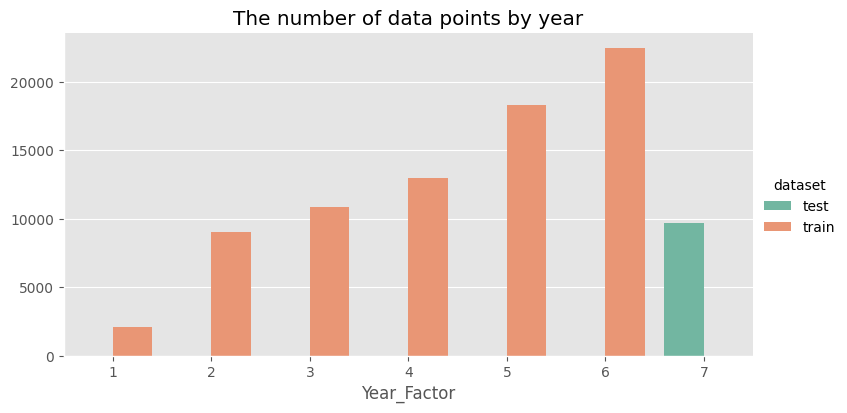

In [21]:
ax = sns.catplot(x='Year_Factor', 
                 y='id', 
                 data=df_all.groupby(['dataset','Year_Factor']).agg({'id':'count'}).reset_index(),
                 hue='dataset',
                 kind='bar',
                 aspect=2,
                 height=4)\
.set(title="The number of data points by year",
     ylabel=None)

# encoded (morphed) value of original year

<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">`train` set contains data points of 7 states, however, `test` doesn't have any data point from `State_6`.</div>

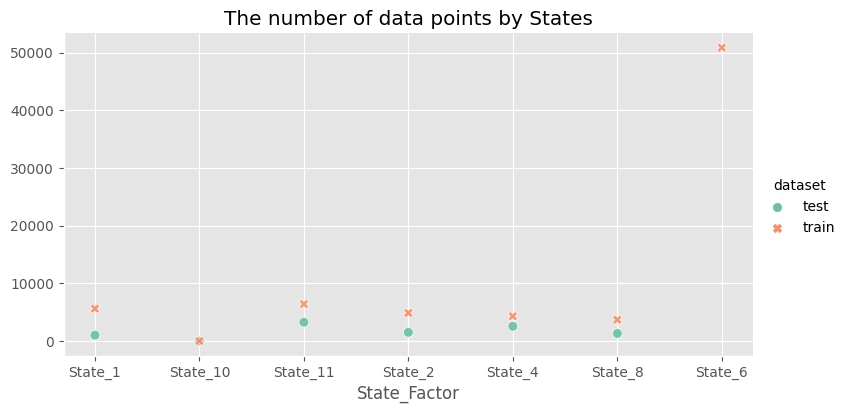

In [22]:
ax = sns.relplot(x='State_Factor', 
                 y='id', 
                 data=df_all.groupby(['dataset','State_Factor']).agg({'id':'count'}).reset_index(),
                 hue='dataset',
                 style='dataset',
                 aspect=2,
                 height=4,
                 s=50,
                 alpha=0.9
                )\
.set(title = "The number of data points by States",
    ylabel=None)

In [23]:
# df_test["state_factor"].unique()

<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">Both residential and commercial buildings are present in both datasets. `train` data contains more residential buildings compared to `test` set which is due to the number of`State_6` buildings in `train` set which seems to add to the number. Apart from `State_6`, the number of commercial buildings are higher than the residential buildings and `State_10` only contains commercial buildings. The type of building and state could be important factors in determining `EUI`.</div>

Text(0.5, 0, '')

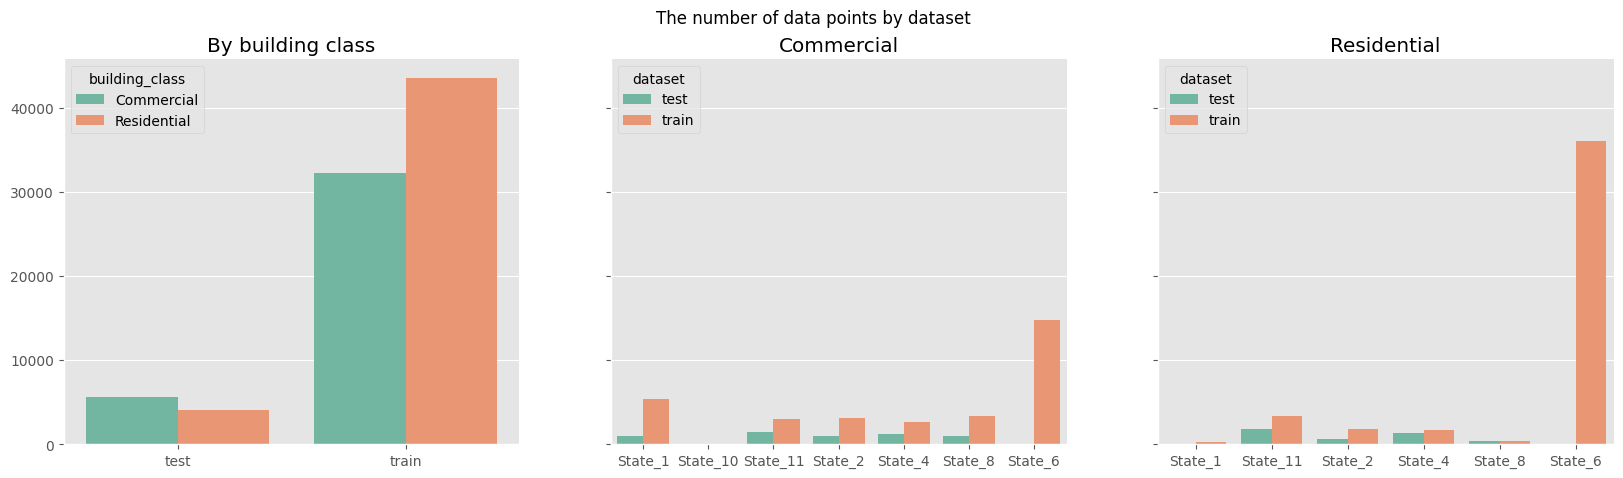

In [24]:
fig, ax = plt.subplots(1,3, figsize=(20,5), sharey=True)
fig.suptitle("The number of data points by dataset")

sns.barplot(x='dataset',
            y='id',
            data=df_all.groupby(['dataset','building_class']).agg({'id':'count'}).reset_index(),
            hue='building_class',
            ax=ax[0],
            ci=False)

for e, s in enumerate(df_all['building_class'].unique(),1):
    sns.barplot(x='State_Factor',
                y='id',
                data=df_all[df_all['building_class']==s].groupby(['dataset','State_Factor']).agg({'id':'count'}).reset_index(),
                hue='dataset',
                ax=ax[e],
                ci=False)
    ax[e].set_title(s)
    ax[e].set_ylabel("")
    ax[e].set_xlabel("")

ax[0].set_title("By building class")
ax[0].set_ylabel("")
ax[0].set_xlabel("")

<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">All facility types are present in both datasets. Almost 90% of residential `Multifamily_uncategorized` buildings and 50% of `Office_uncategorized` are in `State_6` of the training set. Not quite sure how `State_6` will affect the model learning and prediction.</div>

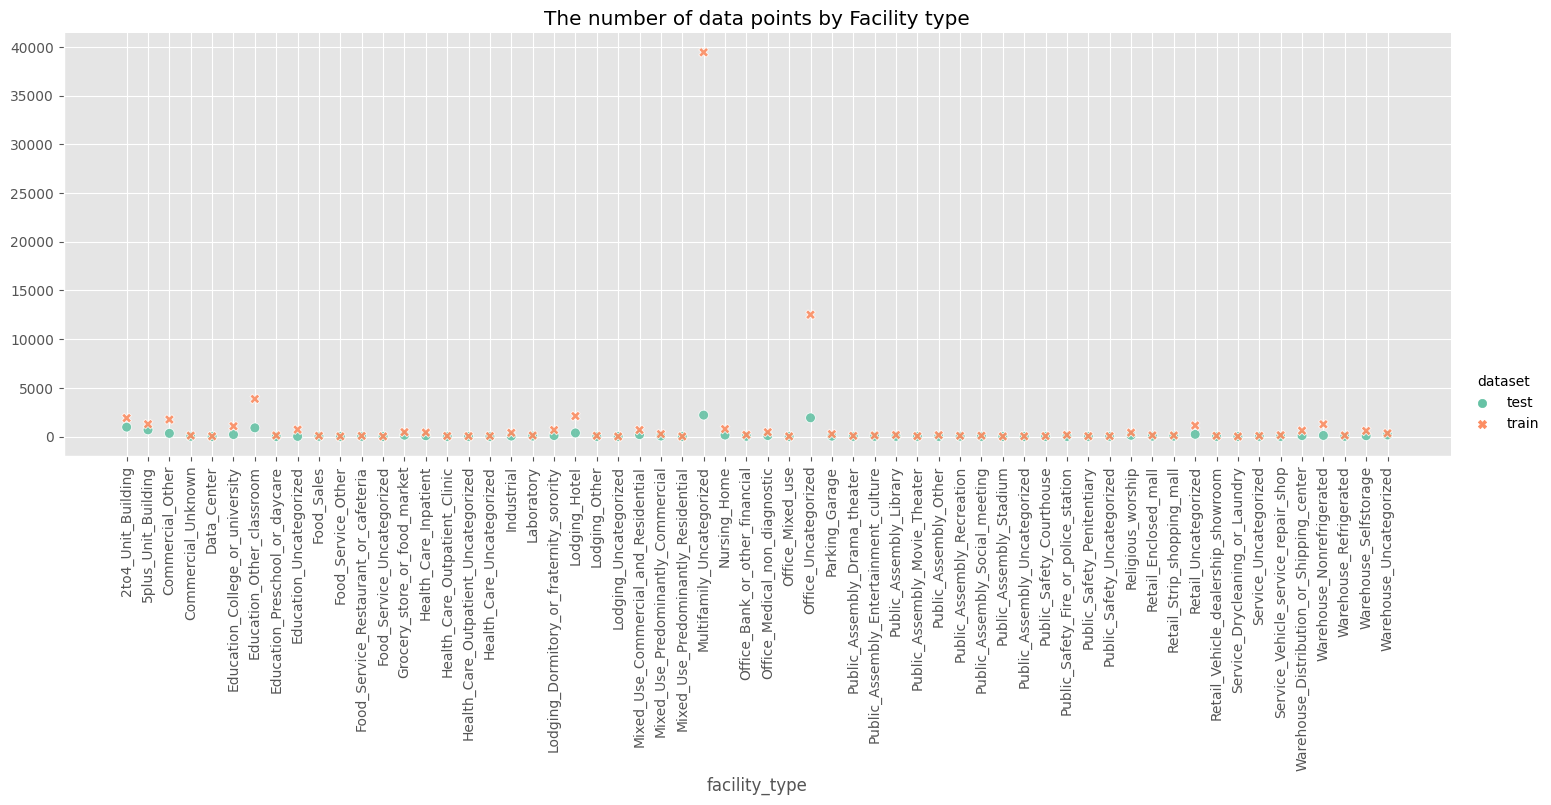

In [25]:
ax = sns.relplot(x='facility_type', 
                 y='id', 
                 data=df_all.groupby(['dataset','facility_type']).agg({'id':'count'}).reset_index(),
                 hue='dataset',
                 style='dataset',
                 aspect=3,
                 height=5,
                 s=50,
                 alpha=0.9
                )\
.set(title = "The number of data points by Facility type",
    ylabel=None)

ax.set_xticklabels(rotation=90) 
None

<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">The oldest building was built in 1600 and the latest in 2016. The majority of the buildings were built since 1900. There were some 0 and null values. Not quite sure what 0 signifies.</div>

In [26]:
df_all['year_built'].value_counts().index.sort_values()

Float64Index([   0.0, 1600.0, 1649.0, 1732.0, 1756.0, 1789.0, 1799.0, 1800.0,
              1811.0, 1815.0,
              ...
              2007.0, 2008.0, 2009.0, 2010.0, 2011.0, 2012.0, 2013.0, 2014.0,
              2015.0, 2016.0],
             dtype='float64', length=183)

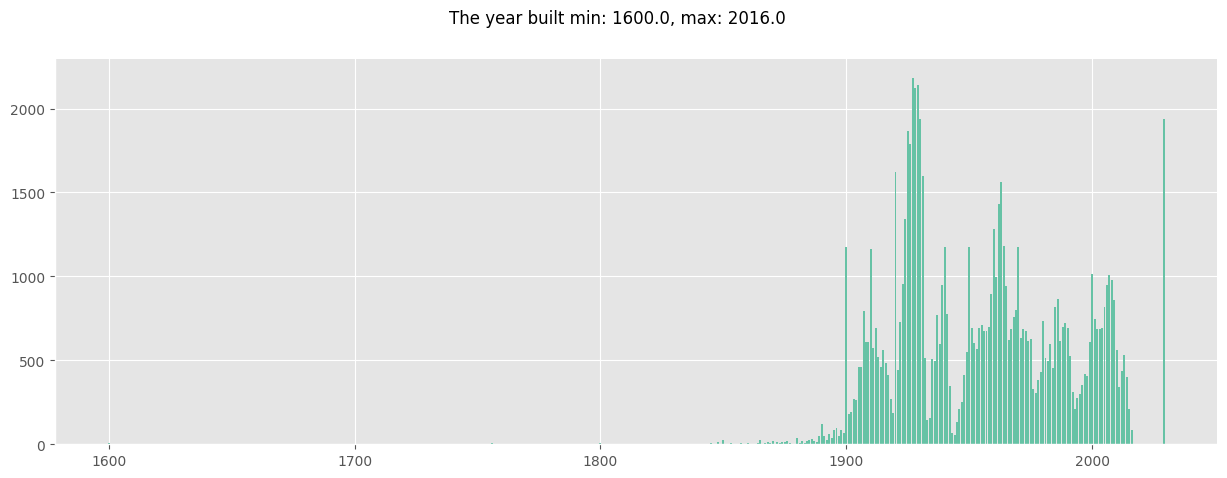

In [27]:
temp = df_all[['year_built']].fillna(2029).replace({0:2029}).astype('category').value_counts().reset_index().rename({0:'count'},axis=1)\
            .sort_values('year_built')
# temp['year_built'] = temp['year_built'].astype('category')
fig, ax = plt.subplots(figsize=(15,5))

ax=plt.bar(temp['year_built'],
           temp['count']
          )

fig.suptitle(f"The year built min: {min(temp['year_built'])}, max: {max(df_all['year_built'])}");

<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">`train` set buildings have higher floor areas compared to `test` set buildings and small positive correlation between `floor_area` and `energy_star_rating` can be observable. </div>

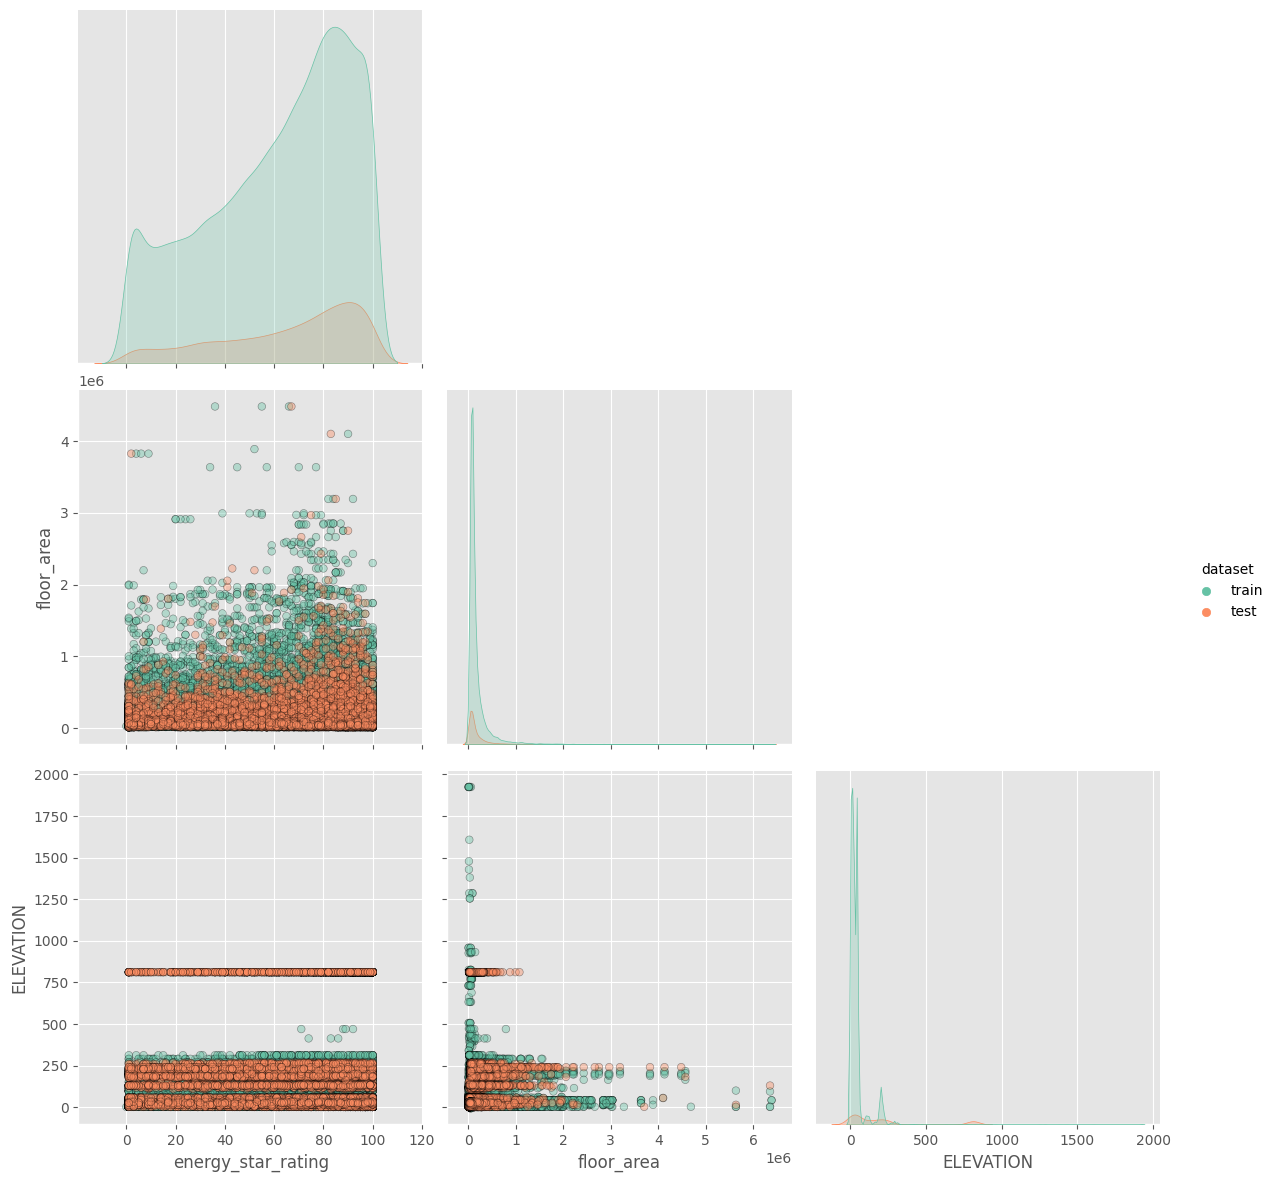

In [28]:
sns.pairplot(df_all,
            vars=['energy_star_rating','floor_area','ELEVATION'], 
            hue='dataset',
            height=4,
            plot_kws = {'alpha': 0.4, 's': 30, 'edgecolor': 'k'},
            corner=True
           );

<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">According to the average temperature (`avg_temp`), if we list states from warmest to coldest: State 1, State 10, State 2, and State 8. The range of temperatures of State1, State 6,  State 11 and State 4 are higher compared to the other states. </div>

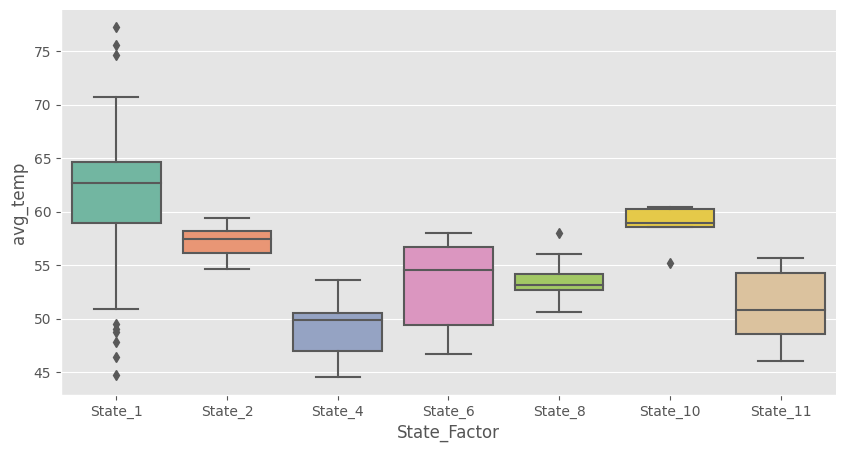

In [29]:
fig, ax = plt.subplots(figsize=(10,5))
sns.boxplot(data=df_all[['avg_temp','State_Factor']].drop_duplicates(), y='avg_temp', x='State_Factor');


# any one categorical col (with low unique vals)

<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">Each month has unique temperature values between 31 and 59 which means the values in temperature volumes are highly repeated for the data points.</div>

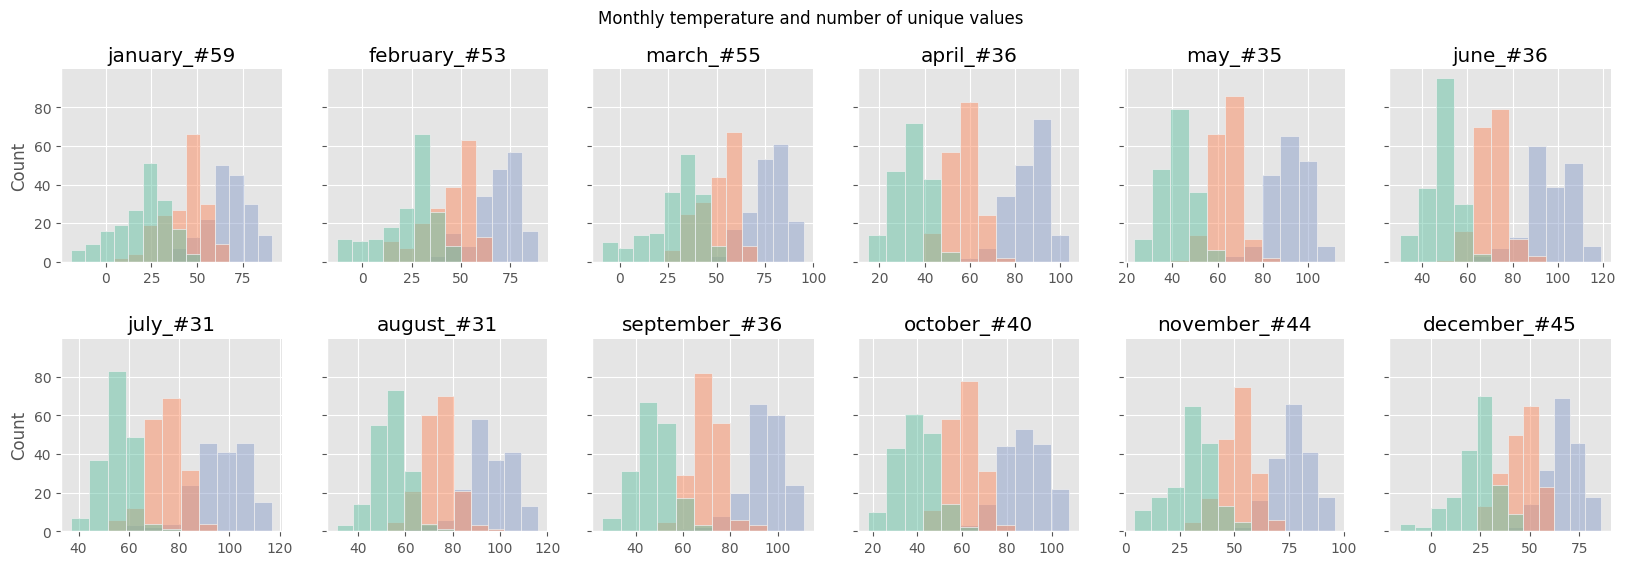

In [30]:
cols = [['january_min_temp', 'january_avg_temp', 'january_max_temp'],
        ['february_min_temp', 'february_avg_temp', 'february_max_temp'],
        ['march_min_temp', 'march_avg_temp', 'march_max_temp'], 
        ['april_min_temp','april_avg_temp', 'april_max_temp'], 
        ['may_min_temp', 'may_avg_temp','may_max_temp'], 
        ['june_min_temp', 'june_avg_temp', 'june_max_temp'],
        ['july_min_temp', 'july_avg_temp', 'july_max_temp'], 
        ['august_min_temp','august_avg_temp', 'august_max_temp'], 
        ['september_min_temp','september_avg_temp', 'september_max_temp'], 
        ['october_min_temp','october_avg_temp', 'october_max_temp'], 
        ['november_min_temp','november_avg_temp', 'november_max_temp'], 
        ['december_min_temp','december_avg_temp', 'december_max_temp']]
        
fig, ax = plt.subplots(2, 6, figsize=(20,6), sharey=True)
fig.suptitle("Monthly temperature and number of unique values")

for e, c in enumerate(cols):
    if e<=5:
        sns.histplot(df_all[c].drop_duplicates(), ax=ax[0,e], legend=False)\
        .set(title=c[0][:c[0].find('_')]+ '_#'+str(len(df_all[c[0]].unique())))
    else:
        sns.histplot(df_all[c].drop_duplicates(), ax=ax[1,e-6], legend=False)\
        .set(title=c[0][:c[0].find('_')]+ '_#'+str(len(df_all[c[0]].unique())))
        
plt.subplots_adjust(hspace=0.4)

<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">Other weather related numerical columns also have few unique values.</div>

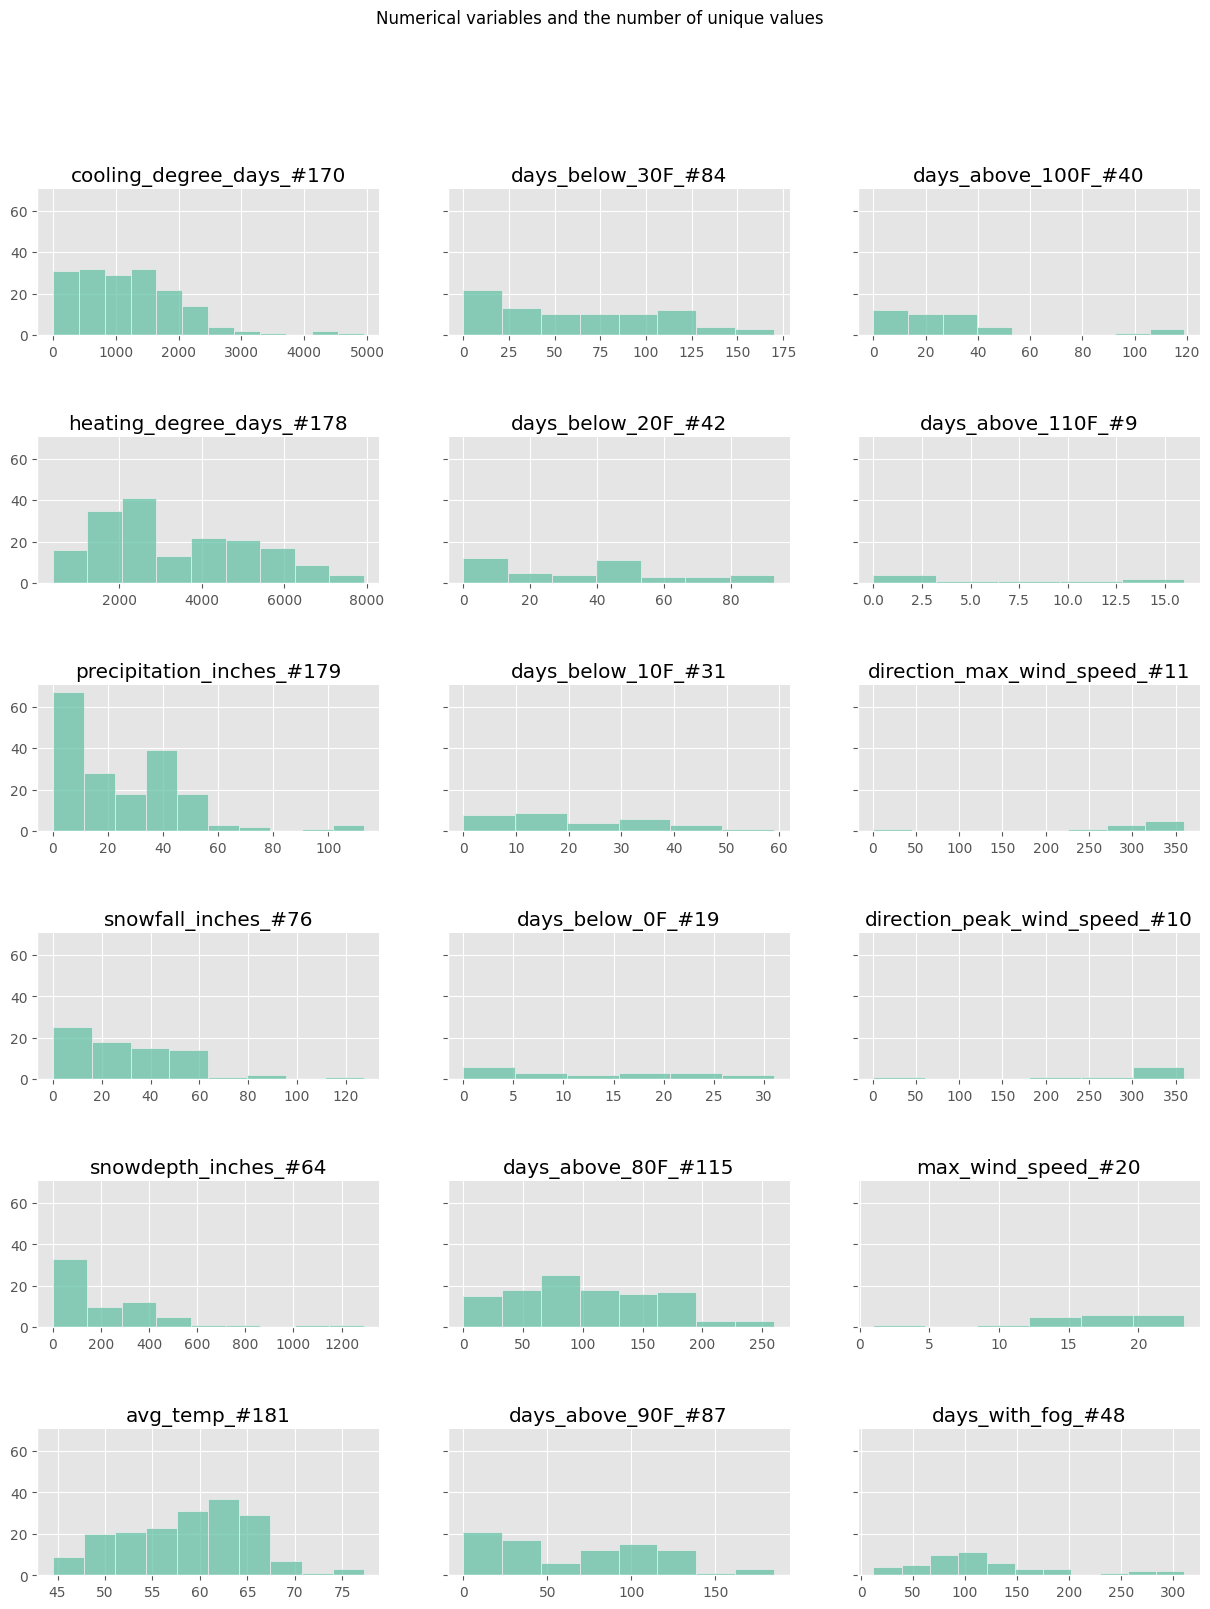

In [31]:
cols=['cooling_degree_days','heating_degree_days', 'precipitation_inches', 'snowfall_inches',
       'snowdepth_inches', 'avg_temp', 'days_below_30F', 'days_below_20F',
       'days_below_10F', 'days_below_0F', 'days_above_80F', 'days_above_90F',
       'days_above_100F', 'days_above_110F', 'direction_max_wind_speed',
       'direction_peak_wind_speed', 'max_wind_speed', 'days_with_fog']

fig, ax = plt.subplots(6,3, figsize=(15,18), sharey=True)
fig.suptitle("Numerical variables and the number of unique values")

for e, c in enumerate(cols):
    if e<=5:
        sns.histplot(df_all[c].drop_duplicates(), ax=ax[e,0], legend=False)\
        .set(title=c+"_#"+str(len(df_all[c].unique())), ylabel=None, xlabel=None)
    elif (e>=6) & (e<=11):
        sns.histplot(df_all[c].drop_duplicates(), ax=ax[e-6,1], legend=False)\
        .set(title=c+"_#"+str(len(df_all[c].unique())), ylabel=None, xlabel=None)
    else:
        sns.histplot(df_all[c].drop_duplicates(), ax=ax[e-12,2], legend=False)\
        .set(title=c+"_#"+str(len(df_all[c].unique())), ylabel=None, xlabel=None)
        
plt.subplots_adjust(hspace=0.7)

In [32]:

# # larger datasets
# find groups in the columns
# elevation, floor areas (dimentions)
# temperature
# wind




### <span style="font-family:cursive;text-align:center">📌Target Variable Exploration (EUI)</span>

In [33]:
# the target is skewed  (log-normal)
# the target has many outliers
# decision:  log-transform,  IQR outlier treatment

# perform:  we do not perform any transformation

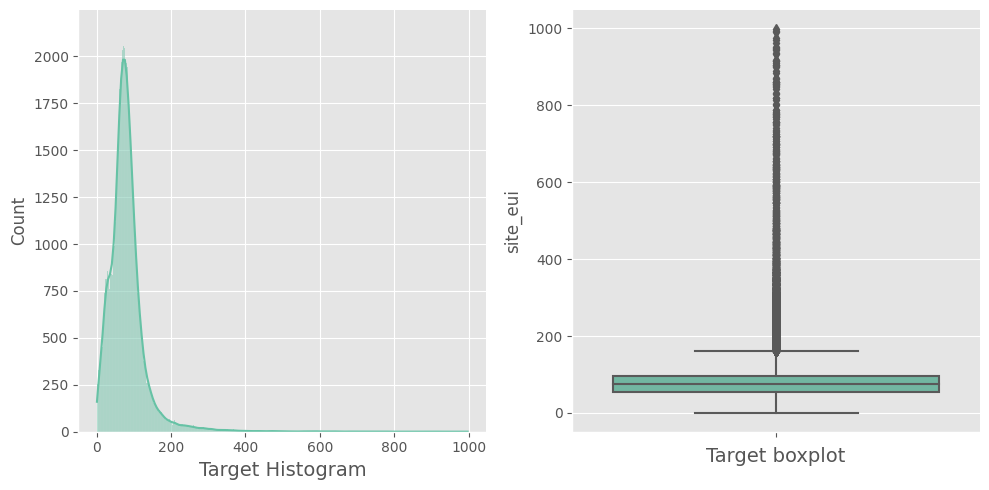

In [34]:
plt.figure(figsize=(10,5))
ax1 = plt.subplot(1,2,1)
cp = sns.histplot(x=df_all['site_eui'], kde=True, palette='Set2')
ax1.set_xlabel('Target Histogram', fontsize=14)
ax2 = plt.subplot(1,2,2)
sns.boxplot(y=df_all['site_eui'], palette='Set2')
ax2.set_xlabel('Target boxplot', fontsize=14)
plt.tight_layout();

<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">State 2 and 4 have slightly higher EUI and State 11 and 8 have lower EUI level.</div>

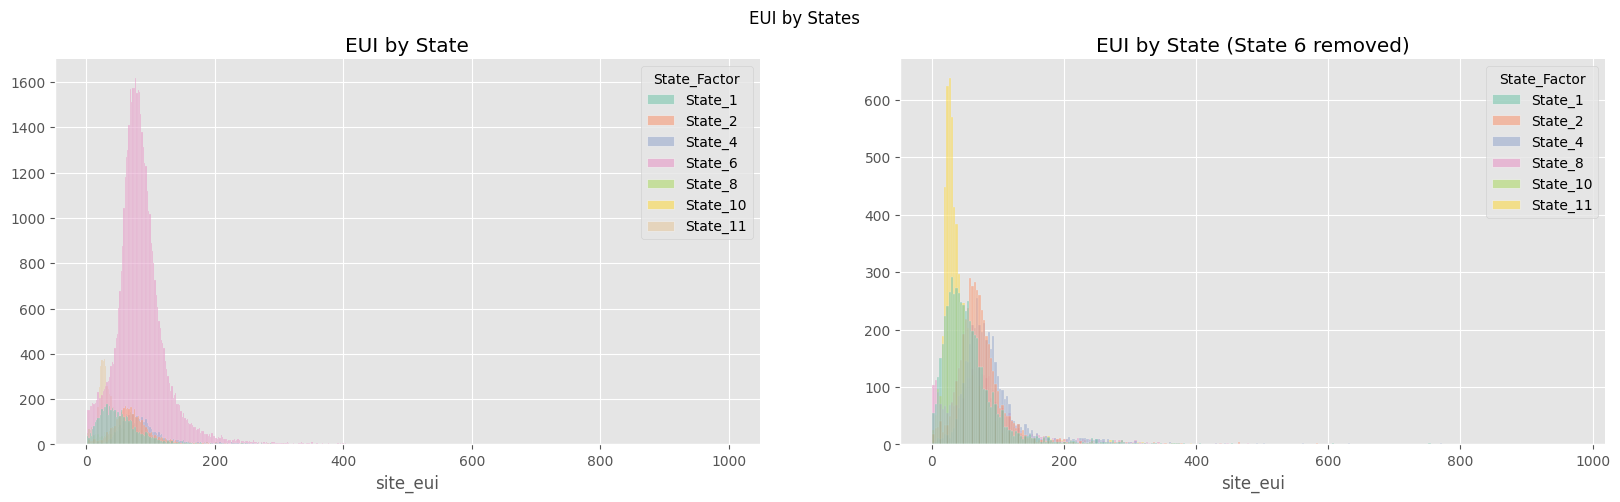

In [35]:
fig, ax = plt.subplots(1,2, figsize=(20,5))
fig.suptitle("EUI by States")

sns.histplot(df_all, x='site_eui',hue='State_Factor', ax=ax[0])\
.set(title='EUI by State', ylabel=None)

sns.histplot(df_all[df_all['State_Factor']!='State_6'], x='site_eui', hue='State_Factor', ax=ax[1])\
.set(title='EUI by State (State 6 removed)', ylabel=None);

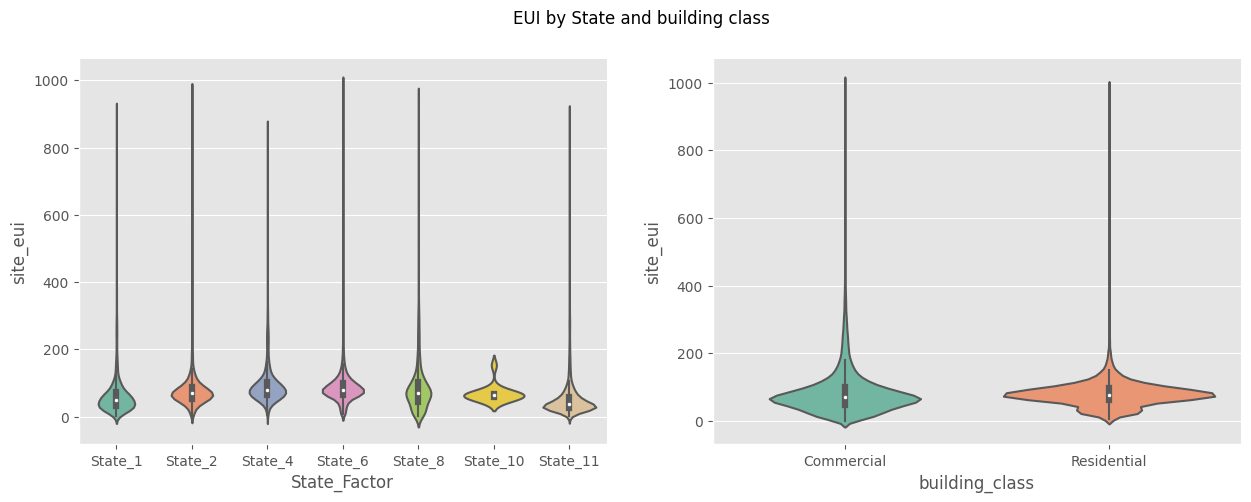

In [36]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
fig.suptitle("EUI by State and building class")

sns.violinplot(data=df_all, y='site_eui', x='State_Factor', ax=ax[0])
sns.violinplot(data=df_all, y='site_eui', x='building_class', ax=ax[1]);

<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">Labs and Data Centers have higher EUI compared to the other types of buildings. Grocery stores, Health Care Inpatient, Health Care Uncategorized, Health Care Outpatient, and Food service, restaurants have higher range of EUI. It could be the essential services must operate for longer hours, therefore, have higher EUI.</div>

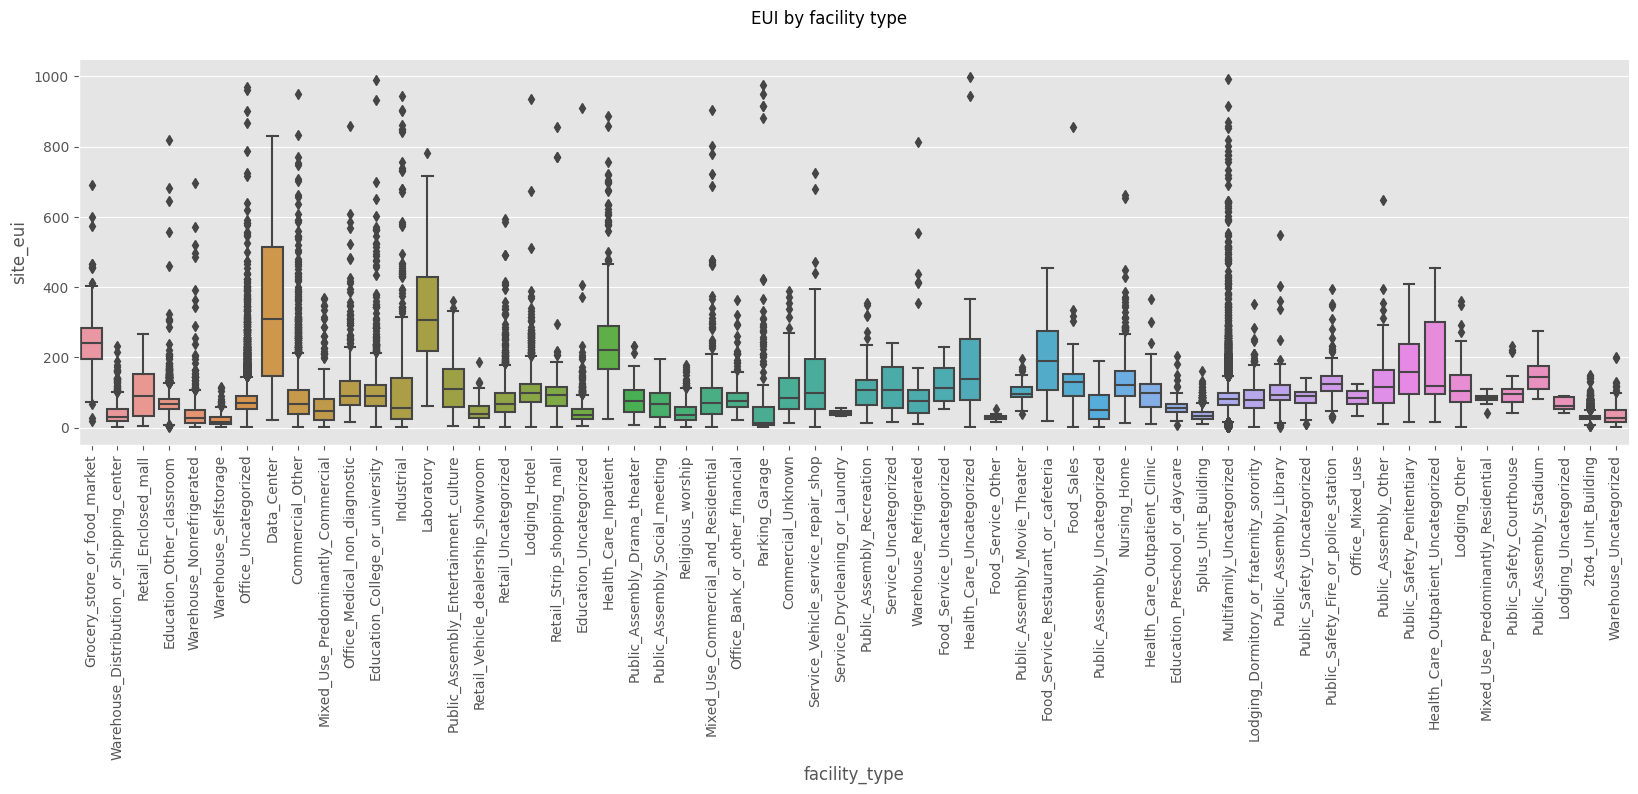

In [37]:
fig, ax = plt.subplots(figsize=(20,5))
fig.suptitle("EUI by facility type")
ax=sns.boxplot(data=df_all, y='site_eui', x='facility_type')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);

<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">`floor_area` could have positive relationship with `EUI`. The younger buildings tend to have higher `EUI` which could be because building height and size have increased over the years. It looks like the Higher the `energy_star_rating` is, the lower the `EUI` becomes.</div>

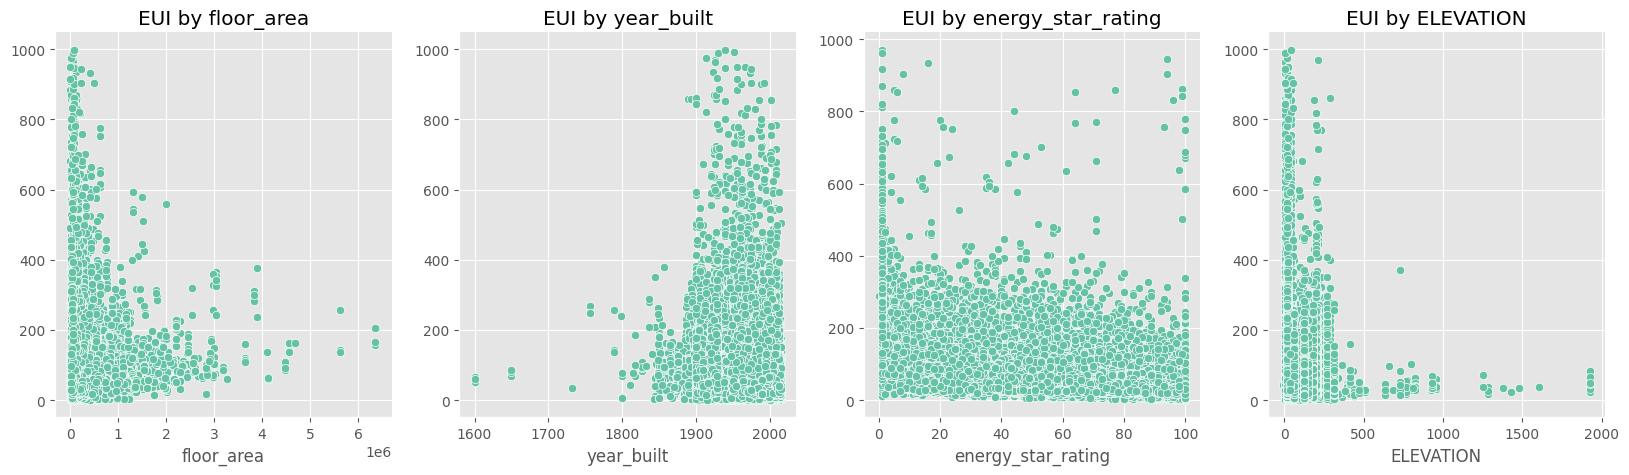

In [38]:
fig, ax = plt.subplots(1,4, figsize=(20,5))

for e, col in enumerate(['floor_area', 'year_built', 'energy_star_rating', 'ELEVATION']):
    if col =='year_built':
        sns.scatterplot(data=df_all[(df_all['year_built']!=0) & (df_all['year_built'].notna())], 
                        x=col, y='site_eui', ax=ax[e]).set(title='EUI by '+ col, ylabel=None)
    else:
        sns.scatterplot(data=df_all, x=col, y='site_eui', ax=ax[e]).set(title='EUI by '+ col, ylabel=None);

<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">The most data points are in lower number of `cooling_degree_days` and higher number of`heating_degree_days`. The majority of the datapoints are also in the lower levels of `snowfall_inches` and `snowdepth_inches`. `direction_max_wind_speed`, `direction_peak_wind_speed`, `max_wind_speed`, and `days_with_fog` columns have the `NA` values of over 50%. No relationship between `EUI` and the weather related numerica columns can be observed from the plot.</div>

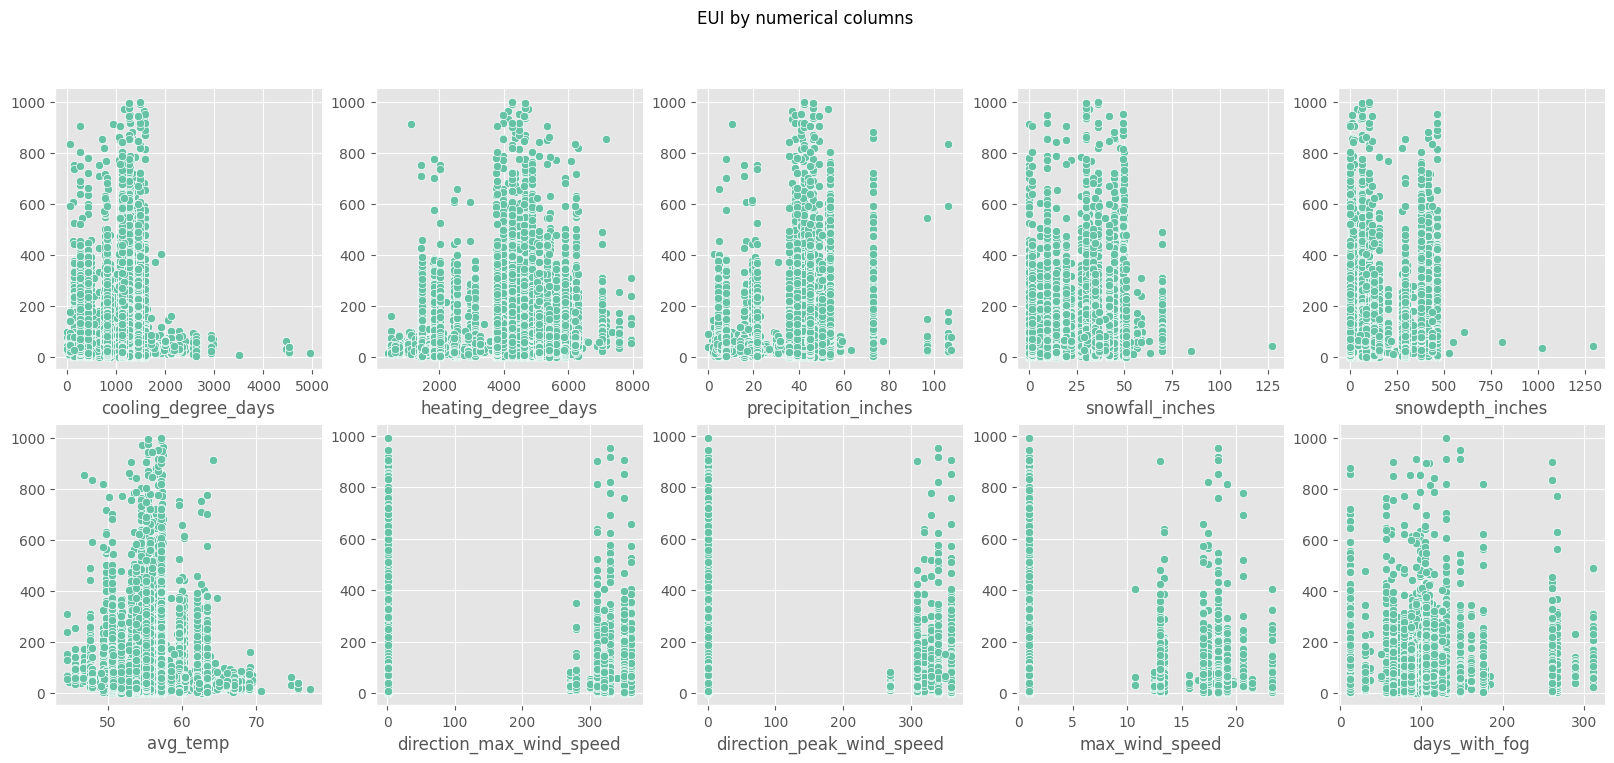

In [39]:
cols=[['cooling_degree_days','heating_degree_days', 'precipitation_inches', 
      'snowfall_inches','snowdepth_inches'], 
      ['avg_temp', 
      'direction_max_wind_speed','direction_peak_wind_speed', 'max_wind_speed', 
      'days_with_fog']]

fig, ax = plt.subplots(2,5, figsize=(20,8))
fig.suptitle('EUI by numerical columns')

for e1, l in enumerate(cols):
    for e2, col in enumerate(l):
        sns.scatterplot(data=df_all, 
                        x=col, y='site_eui', ax=ax[e1, e2]).set(ylabel=None);

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">
<h3 align="left"><font color='#DEB887'>💡 Observations:</font></h3>

- Categorical variables such as `State_Factor`, `building_class` and `facility_type` might have some correlation with `EUI`.
- `State_6` is not present in `test` set. State 6 removed training data should be tested.
- `floor_area`, `energe_star_rating` should be included in the modelling to be tested.
- From the plots, it's difficult to observe direct (linear) relationship between `EUI` and weather related variables. However, this doesn't deny non-linear relationships among the variables.
- Variables with more than 50% `NA` values should not be imputed (in my opinion) and better to be not included in the training set.
- Weather variables have few unique values repeated throughout the datapoints. Not sure how this duplicated values might affect the modeling and prediction.

# <span style="font-family:cursive;text-align:center">⚙️ Preprocessing</span>



<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">
    we will suppose that two  if two buildings have the same values for these features;   
they are the same building, in other words groupby_cols = (building_id)


Removing duplicates by clubbing similar building data
</div>

In [40]:
# null values,
# weather data points have a lot of repetition
# categories encoded

In [41]:
groupby_cols = ['State_Factor','building_class','facility_type','floor_area','year_built']
df_all = df_all.sort_values(by=groupby_cols+['Year_Factor']).reset_index(drop=True)

In [42]:
df_all.loc[:,df_all.dtypes=='object'].columns

Index(['State_Factor', 'building_class', 'facility_type', 'dataset'], dtype='object')


<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">
    Null imputation for categorical values: <b>KNN Imputing</b>
</div>

In [43]:
df_all_one_hot = df_all.copy()

cats = ['State_Factor', 'facility_type', 'building_class']
for col in cats:
    dummies = pd.get_dummies(df_all_one_hot[col], dummy_na=False)
    for ohe_col in dummies:
        df_all_one_hot[f'ohe_{col}_{ohe_col}'] = dummies[ohe_col]

In [44]:
df_all_one_hot

Year_Factor State_Factor building_class              facility_type  \
0                3      State_1     Commercial           Commercial_Other   
1                4      State_1     Commercial           Commercial_Other   
2                5      State_1     Commercial           Commercial_Other   
3                7      State_1     Commercial           Commercial_Other   
4                3      State_1     Commercial           Commercial_Other   
...            ...          ...            ...                        ...   
85457            7      State_8    Residential  Multifamily_Uncategorized   
85458            6      State_8    Residential  Multifamily_Uncategorized   
85459            7      State_8    Residential  Multifamily_Uncategorized   
85460            6      State_8    Residential  Multifamily_Uncategorized   
85461            7      State_8    Residential  Multifamily_Uncategorized   

       floor_area  year_built  energy_star_rating  ELEVATION  \
0         10149.0      1931.0                 NaN       45.7   
1         10149.0      1931.0                 NaN      120.4   
2         10149.0      1931.0                 NaN       59.1   
3         10149.0      1931.0                 NaN       59.1   
4         10755.0      1937.0                 NaN        9.1   
...           ...         ...                 ...        ...   
85457    900000.0      1960.0                90.0      130.8   
85458   1179072.0      1959.0                96.0        3.0   
85459   1179072.0      1959.0                92.0      130.8   
85460   1195034.0      1964.0                75.0        3.0   
85461   1195034.0      1964.0                77.0      130.8   

       january_min_temp  january_avg_temp  january_max_temp  \
0                    26         44.516129                64   
1                    41         55.096774                73   
2                    29         51.387097                77   
3                    38         50.596774                64   
4                    22         44.790323                65   
...                 ...               ...               ...   
85457                 2         33.435484                61   
85458                 8         29.827586                62   
85459                 2         33.435484                61   
85460                 8         29.827586                62   
85461                 2         33.435484                61   

       february_min_temp  february_avg_temp  february_max_temp  \
0                     30          49.392857                 69   
1                     42          54.875000                 71   
2                     36          56.803571                 75   
3                     40          54.482143                 66   
4                     25          47.892857                 71   
...                  ...                ...                ...   
85457                 16          37.660714                 73   
85458                  4          33.896552                 62   
85459                 16          37.660714                 73   
85460                  4          33.896552                 62   
85461                 16          37.660714                 73   

       march_min_temp  march_avg_temp  march_max_temp  april_min_temp  \
0                  37       55.967742              77              40   
1                  47       59.032258              76              47   
2                  40       61.435484              85              41   
3                  42       56.935484              77              45   
4                  32       53.112903              79              34   
...               ...             ...             ...             ...   
85457               8       35.935484              69              28   
85458              24       45.967742              79              18   
85459               8       35.935484              69              28   
85460              24       45.96

In [45]:
# This takes 1 hr, hence, unpickle the df1 and carry on with knn_imputing = False

knn_imputing = False
target='site_eui'

if knn_imputing:
    imputer = KNNImputer(n_neighbors=7)
    tmp = df_all[['State_Factor', 'building_class', 'facility_type', 'dataset', target]]
    df = df_all.drop(tmp.columns, axis=1)
    df1 = pd.DataFrame(imputer.fit_transform(df),columns = df.columns)
    tmp.to_csv('imputer_tmp.csv', index=False)
    df1.to_csv('imputer_df1.csv', index=False)
    joblib.dump(imputer, 'knn_imputer.pkl')

else:
    df1 = pd.read_csv('imputer_df1.csv')
    tmp = df_all[['State_Factor', 'building_class', 'facility_type', 'dataset', target]]
    df_all = df_all.drop(tmp.columns, axis=1)
    for col in tmp.columns:
        df_all[col]=tmp[col]
    for col in df1.columns:
        df_all[col] = df1[col]


# df1: no null values
# tmp: seperated columns
#     df1 + tmp  => final df



# null points  => neighbours (most gets imputed)

<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">
    <b>Target encoding</b> for categorical columns.  
Target encoding is the process of replacing a categorical value with the mean of the target variable. Any non-categorical columns are automatically dropped by the target encoder model.

Note: You can also use target encoding to convert categorical columns to numeric. 

> “features are replaced with a blend of posterior probability of the target given particular categorical value and the prior probability of the target over all the training data.”

[Target Encoding Vs. One-hot Encoding with Simple Examples](https://medium.com/analytics-vidhya/target-encoding-vs-one-hot-encoding-with-simple-examples-276a7e7b3e64)
<div>

In [46]:
df_all_te = df_all.copy()

cats = ['State_Factor', 'building_class', 'facility_type']
for col in cats:
    encoder = TargetEncoder()
    df_all_te[f'te_{col}'] = encoder.fit_transform(df_all_te[col], df_all_te[target])

In [47]:
df_all_te

Year_Factor  floor_area  year_built  energy_star_rating  ELEVATION  \
0              3.0     10149.0      1931.0           38.428571       45.7   
1              4.0     10149.0      1931.0           43.571429      120.4   
2              5.0     10149.0      1931.0           37.571429       59.1   
3              7.0     10149.0      1931.0           60.285714       59.1   
4              3.0     10755.0      1937.0           45.571429        9.1   
...            ...         ...         ...                 ...        ...   
85457          7.0    900000.0      1960.0           90.000000      130.8   
85458          6.0   1179072.0      1959.0           96.000000        3.0   
85459          7.0   1179072.0      1959.0           92.000000      130.8   
85460          6.0   1195034.0      1964.0           75.000000        3.0   
85461          7.0   1195034.0      1964.0           77.000000      130.8   

       january_min_temp  january_avg_temp  january_max_temp  \
0                  26.0         44.516129              64.0   
1                  41.0         55.096774              73.0   
2                  29.0         51.387097              77.0   
3                  38.0         50.596774              64.0   
4                  22.0         44.790323              65.0   
...                 ...               ...               ...   
85457               2.0         33.435484              61.0   
85458               8.0         29.827586              62.0   
85459               2.0         33.435484              61.0   
85460               8.0         29.827586              62.0   
85461               2.0         33.435484              61.0   

       february_min_temp  february_avg_temp  february_max_temp  \
0                   30.0          49.392857               69.0   
1                   42.0          54.875000               71.0   
2                   36.0          56.803571               75.0   
3                   40.0          54.482143               66.0   
4                   25.0          47.892857               71.0   
...                  ...                ...                ...   
85457               16.0          37.660714               73.0   
85458                4.0          33.896552               62.0   
85459               16.0          37.660714               73.0   
85460                4.0          33.896552               62.0   
85461               16.0          37.660714               73.0   

       march_min_temp  march_avg_temp  march_max_temp  april_min_temp  \
0                37.0       55.967742            77.0            40.0   
1                47.0       59.032258            76.0            47.0   
2                40.0       61.435484            85.0            41.0   
3                42.0       56.935484            77.0            45.0   
4                32.0       53.112903            79.0            34.0   
...               ...             ...             ...             ...   
85457             8.0       35.935484            69.0            28.0   
85458            24.0       45.967742            79.0            18.0   
85459             8.0       35.935484            69.0            28.0   
85460            24.0       45.967742            79.0            18.0   
85461             8.0       35.935484            69.0            28.0   

       april_avg_temp  april_max_temp  may_min_temp  may_avg_temp  \
0           61.783333            90.0          45.0     65.129032   
1           60.100000            90.0          51.0     63.483871   
2           60.966667            91.0          45.0     62.887097   
3           58.450000            78.0          49.0     60.903226   
4           58.866667            87.0          35.0     62.096774   
...               ...             ...           ...           ...   
85457       54.800000            85.0          38.0     59.096774   
85458       49.931034            81.0          37.0     59.161290   
85459       54.800000            8

# <span style="font-family:cursive;text-align:center">Feature Engineering</span>

<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;"> 
    <font size='3.5pt'><b>Weather based features</b></font>

we will extract new weather statistics from the building location weather features

In [48]:
# extract new weather statistics from the building location weather features
temp = [col for col in df_all_te.columns if 'temp' in col]

df_all_te['min_temp'] = df_all_te[temp].min(axis=1)
df_all_te['max_temp'] = df_all_te[temp].max(axis=1)
df_all_te['avg_temp'] = df_all_te[temp].mean(axis=1)
df_all_te['std_temp'] = df_all_te[temp].std(axis=1)
df_all_te['skew_temp'] = df_all_te[temp].skew(axis=1)


# by seasons
temp = pd.Series([col for col in df_all_te.columns if 'temp' in col])

winter_temp = temp[temp.apply(lambda x: ('january' in x or 'february' in x or 'december' in x))].values
spring_temp = temp[temp.apply(lambda x: ('march' in x or 'april' in x or 'may' in x))].values
summer_temp = temp[temp.apply(lambda x: ('june' in x or 'july' in x or 'august' in x))].values
autumn_temp = temp[temp.apply(lambda x: ('september' in x or 'october' in x or 'november' in x))].values


### winter
df_all_te['min_winter_temp'] = df_all_te[winter_temp].min(axis=1)
df_all_te['max_winter_temp'] = df_all_te[winter_temp].max(axis=1)
df_all_te['avg_winter_temp'] = df_all_te[winter_temp].mean(axis=1)
df_all_te['std_winter_temp'] = df_all_te[winter_temp].std(axis=1)
df_all_te['skew_winter_temp'] = df_all_te[winter_temp].skew(axis=1)
### spring
df_all_te['min_spring_temp'] = df_all_te[spring_temp].min(axis=1)
df_all_te['max_spring_temp'] = df_all_te[spring_temp].max(axis=1)
df_all_te['avg_spring_temp'] = df_all_te[spring_temp].mean(axis=1)
df_all_te['std_spring_temp'] = df_all_te[spring_temp].std(axis=1)
df_all_te['skew_spring_temp'] = df_all_te[spring_temp].skew(axis=1)
### summer
df_all_te['min_summer_temp'] = df_all_te[summer_temp].min(axis=1)
df_all_te['max_summer_temp'] = df_all_te[summer_temp].max(axis=1)
df_all_te['avg_summer_temp'] = df_all_te[summer_temp].mean(axis=1)
df_all_te['std_summer_temp'] = df_all_te[summer_temp].max(axis=1)
df_all_te['skew_summer_temp'] = df_all_te[summer_temp].max(axis=1)
## autumn
df_all_te['min_autumn_temp'] = df_all_te[autumn_temp].min(axis=1)
df_all_te['max_autumn_temp'] = df_all_te[autumn_temp].max(axis=1)
df_all_te['avg_autumn_temp'] = df_all_te[autumn_temp].mean(axis=1)
df_all_te['std_autumn_temp'] = df_all_te[autumn_temp].std(axis=1)
df_all_te['skew_autumn_temp'] = df_all_te[autumn_temp].skew(axis=1)

In [49]:
df_all_te['month_cooling_degree_days'] = df_all_te['cooling_degree_days']/12
df_all_te['month_heating_degree_days'] = df_all_te['heating_degree_days']/12

In [50]:
df_all_te[temp]

january_min_temp  january_avg_temp  january_max_temp  \
0                  26.0         44.516129              64.0   
1                  41.0         55.096774              73.0   
2                  29.0         51.387097              77.0   
3                  38.0         50.596774              64.0   
4                  22.0         44.790323              65.0   
...                 ...               ...               ...   
85457               2.0         33.435484              61.0   
85458               8.0         29.827586              62.0   
85459               2.0         33.435484              61.0   
85460               8.0         29.827586              62.0   
85461               2.0         33.435484              61.0   

       february_min_temp  february_avg_temp  february_max_temp  \
0                   30.0          49.392857               69.0   
1                   42.0          54.875000               71.0   
2                   36.0          56.803571               75.0   
3                   40.0          54.482143               66.0   
4                   25.0          47.892857               71.0   
...                  ...                ...                ...   
85457               16.0          37.660714               73.0   
85458                4.0          33.896552               62.0   
85459               16.0          37.660714               73.0   
85460                4.0          33.896552               62.0   
85461               16.0          37.660714               73.0   

       march_min_temp  march_avg_temp  march_max_temp  april_min_temp  \
0                37.0       55.967742            77.0            40.0   
1                47.0       59.032258            76.0            47.0   
2                40.0       61.435484            85.0            41.0   
3                42.0       56.935484            77.0            45.0   
4                32.0       53.112903            79.0            34.0   
...               ...             ...             ...             ...   
85457             8.0       35.935484            69.0            28.0   
85458            24.0       45.967742            79.0            18.0   
85459             8.0       35.935484            69.0            28.0   
85460            24.0       45.967742            79.0            18.0   
85461             8.0       35.935484            69.0            28.0   

       april_avg_temp  april_max_temp  may_min_temp  may_avg_temp  \
0           61.783333            90.0          45.0     65.129032   
1           60.100000            90.0          51.0     63.483871   
2           60.966667            91.0          45.0     62.887097   
3           58.450000            78.0          49.0     60.903226   
4           58.866667            87.0          35.0     62.096774   
...               ...             ...           ...           ...   
85457       54.800000            85.0          38.0     59.096774   
85458       49.931034            81.0          37.0     59.161290   
85459       54.800000            85.0          38.0     59.096774   
85460       49.931034            81.0          37.0     59.161290   
85461       54.800000            85.0          38.0     59.096774   

       may_max_temp  june_min_temp  june_avg_temp  june_max_temp  \
0              91.0           52.0      70.016667          104.0   
1              92.0           52.0      64.250000           87.0   
2              90.0           55.0      72.983333          106.0   
3              87.0           51.0      63.150000           97.0   
4              91.0           44.0      66.283333           99.0   
...             ...            ...            ...            ...   
85457          92.0           40.0      68.689655           91.0   
85458          89.0           45.0      70.465517           90.0   
85459          92.0           40.0      68.689655           91.0   
85460          89.0           45.0      70.465517           90.0   
854

In [51]:
df_all_te['cooling_degree_days']

0         826.0
1         497.0
2        1319.0
3         342.0
4         303.0
          ...  
85457     866.0
85458    1114.0
85459     866.0
85460    1114.0
85461     866.0
Name: cooling_degree_days, Length: 85462, dtype: float64

In [52]:
df_all_te[['min_winter_temp', 'max_winter_temp', 'avg_winter_temp', 'std_winter_temp', 'skew_winter_temp',
           'min_spring_temp', 'max_spring_temp', 'avg_spring_temp', 'std_spring_temp', 'skew_spring_temp',
           'min_summer_temp', 'max_summer_temp', 'avg_summer_temp', 'std_summer_temp', 'skew_summer_temp',
           'min_autumn_temp', 'max_autumn_temp', 'avg_autumn_temp', 'std_autumn_temp', 'skew_autumn_temp']]

min_winter_temp  max_winter_temp  avg_winter_temp  std_winter_temp  \
0                 24.0             69.0        46.699565        17.630529   
1                 41.0             73.0        55.862455        12.779553   
2                 28.0             77.0        52.196813        18.727631   
3                 38.0             66.0        52.107335        11.619161   
4                 16.0             71.0        44.780210        20.572244   
...                ...              ...              ...              ...   
85457              2.0             73.0        34.781059        25.280345   
85458              4.0             62.0        33.872574        22.974302   
85459              2.0             73.0        34.781059        25.280345   
85460              4.0             62.0        33.872574        22.974302   
85461              2.0             73.0        34.781059        25.280345   

       skew_winter_temp  min_spring_temp  max_spring_temp  avg_spring_temp  \
0              0.021018             37.0             91.0        62.542234   
1              0.081583             47.0             92.0        65.068459   
2              0.005259             40.0             91.0        64.143250   
3             -0.034349             42.0             87.0        61.587634   
4             -0.084189             32.0             91.0        59.119594   
...                 ...              ...              ...              ...   
85457          0.107184              8.0             92.0        52.203584   
85458          0.053637             18.0             89.0        53.673341   
85459          0.107184              8.0             92.0        52.203584   
85460          0.053637             18.0             89.0        53.673341   
85461          0.107184              8.0             92.0        52.203584   

       std_spring_temp  skew_spring_temp  min_summer_temp  max_summer_temp  \
0            20.284168          0.250054             52.0            104.0   
1            17.251378          0.670141             52.0             90.0   
2            20.398627          0.230872             55.0            106.0   
3            15.818993          0.417654             51.0             97.0   
4            22.864101          0.160184             44.0             99.0   
...                ...               ...              ...              ...   
85457        27.390463         -0.033897             40.0             91.0   
85458        25.423297          0.041405             45.0             96.0   
85459        27.390463         -0.033897             40.0             91.0   
85460        25.423297          0.041405             45.0             96.0   
85461        27.390463         -0.033897             40.0             91.0   

       avg_summer_temp  std_summer_temp  skew_summer_temp  min_autumn_temp  \
0            74.858483            104.0             104.0             36.0   
1            68.574373             90.0              90.0             46.0   
2            78.697073            106.0             106.0             29.0   
3            68.918100             97.0              97.0             43.0   
4            68.673059             99.0              99.0             31.0   
...                ...              ...               ...              ...   
85457        69.992399             91.0              91.0             17.0   
85458        73.363851             96.0              96.0             20.0   
85459        69.992399             91.0              91.0             17.0   
85460        73.363851             96.0              96.0             20.0   
85461        69.992399             91.0              91.0             17.0   

       max_autumn_temp  avg_autumn_temp  std_autumn_temp  skew_autumn_temp  
0                 98.0        63.361111        20.462133          0.360253  
1                 95.0        67.521625        15.342943          0.494753  
2                105.0        67.003405 

<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;"> 
    <font size='3.5pt'><b>Buildig based feature:</b></font>

we will extract building statistics

In [53]:
# total area
df_all_te['building_area'] = df_all_te['floor_area'] * df_all_te['ELEVATION']
# rating energy by floor
df_all_te['floor_energy_star_rating'] = df_all_te['energy_star_rating']/df_all_te['ELEVATION']


In [54]:
df_all_te[["floor_area", "ELEVATION", "energy_star_rating", "floor_energy_star_rating", "building_area"]]

floor_area  ELEVATION  energy_star_rating  floor_energy_star_rating  \
0         10149.0       45.7           38.428571                  0.840888   
1         10149.0      120.4           43.571429                  0.361889   
2         10149.0       59.1           37.571429                  0.635726   
3         10149.0       59.1           60.285714                  1.020063   
4         10755.0        9.1           45.571429                  5.007849   
...           ...        ...                 ...                       ...   
85457    900000.0      130.8           90.000000                  0.688073   
85458   1179072.0        3.0           96.000000                 32.000000   
85459   1179072.0      130.8           92.000000                  0.703364   
85460   1195034.0        3.0           75.000000                 25.000000   
85461   1195034.0      130.8           77.000000                  0.588685   

       building_area  
0           463809.3  
1          1221939.6  
2           599805.9  
3           599805.9  
4            97870.5  
...              ...  
85457    117720000.0  
85458      3537216.0  
85459    154222617.6  
85460      3585102.0  
85461    156310447.2  

[85462 rows x 5 columns]

### <span style="font-family:cursive;text-align:center">Checking target variable transformation</span>

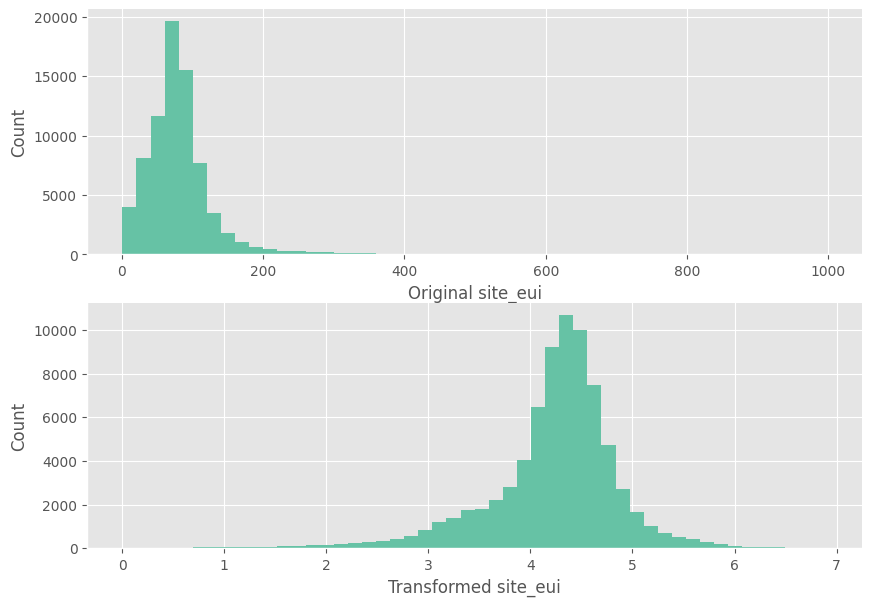

In [55]:
target = 'site_eui'
plt.figure(figsize=(10,7))
# plot the original variable vs sale price    
plt.subplot(2, 1, 1)
train[target].hist(bins=50)
plt.ylabel('Count')
plt.xlabel('Original ' + target)

# plot transformed variable vs sale price
plt.subplot(2, 1, 2)
np.log(train[target]).hist(bins=50)
plt.ylabel('Count')
plt.xlabel('Transformed ' + target);

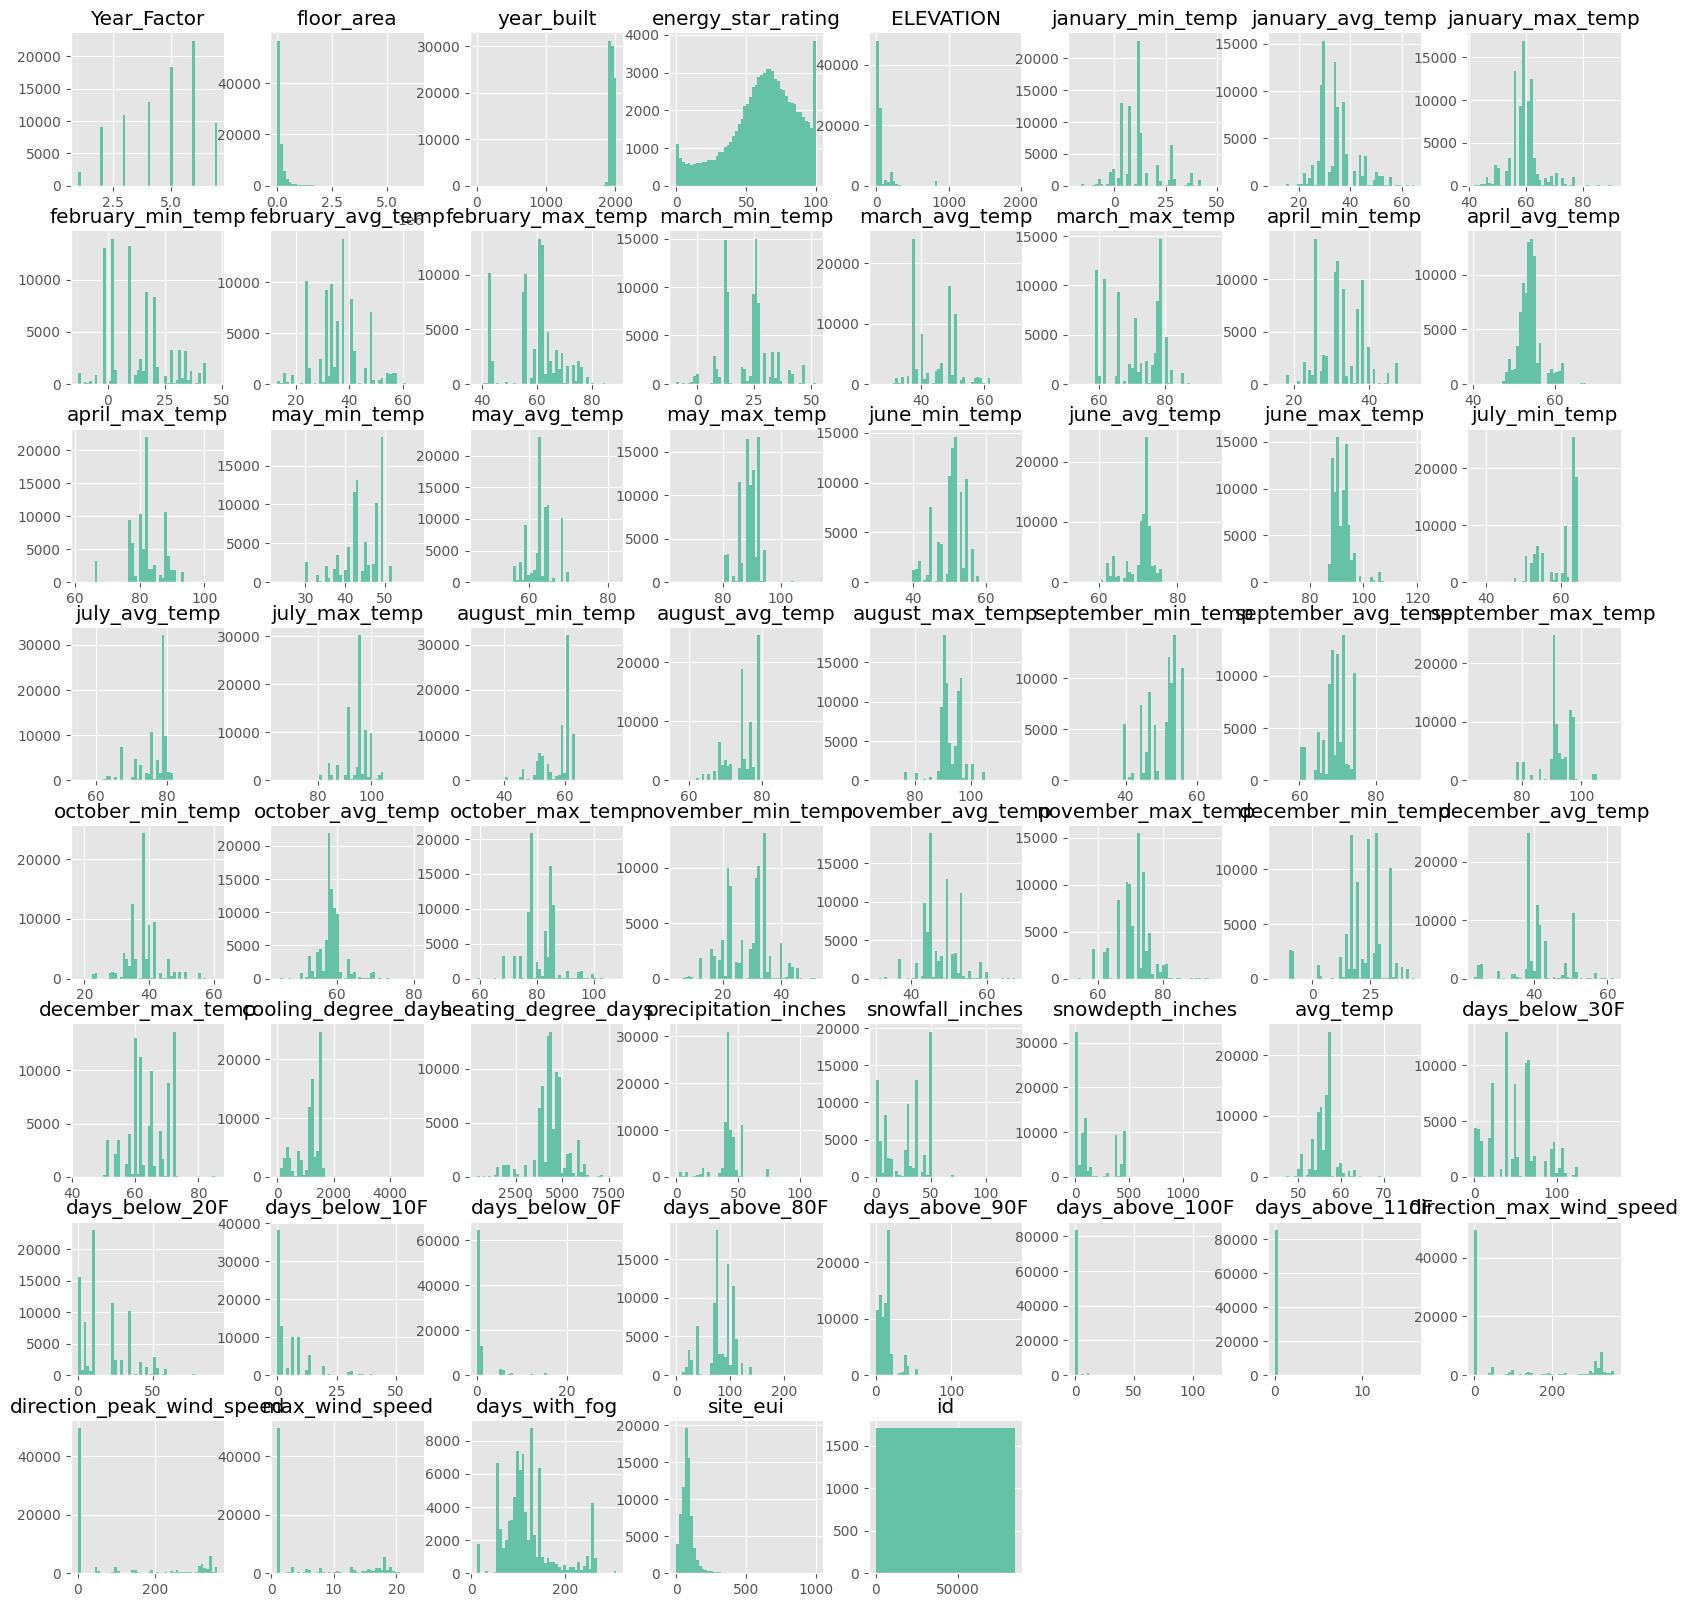

In [56]:
nums = train.loc[:, train.dtypes != 'object'].columns
df_all[nums].hist(bins=50, figsize=(20,20))
plt.show();

In [57]:
df_all_te[nums].skew().sort_values(key=abs, ascending=False)[:5]

days_above_110F    89.873857
days_above_100F    24.615438
year_built        -11.716647
floor_area          6.701786
ELEVATION           5.140444
dtype: float64

<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;"> 
    Binarize very skewed variables

In [58]:
skewed = ['days_above_110F', 'days_above_100F']

for var in skewed:
    
    # map the variable values into 0 and 1
    df_all_te[var] = np.where(df_all_te[var]==0, 0, 1)

### <span style="font-family:cursive;text-align:center">Saving feature dataset</span>

In [59]:
saved = False
if saved:
    !pip install pickle5 --quiet
    import pickle5 as pickle
    data_path = 'feature_transformed_set_TEonly.pkl'
    with open(data_path, "rb") as fh:
        df = pickle.load(fh)
else:
    df_all.to_pickle('feature_transformed_set_TEonly.pkl')

In [60]:
df_all_te.shape

(85462, 96)

In [61]:
df_all_te.head()

Year_Factor  floor_area  year_built  energy_star_rating  ELEVATION  \
0          3.0     10149.0      1931.0           38.428571       45.7   
1          4.0     10149.0      1931.0           43.571429      120.4   
2          5.0     10149.0      1931.0           37.571429       59.1   
3          7.0     10149.0      1931.0           60.285714       59.1   
4          3.0     10755.0      1937.0           45.571429        9.1   

   january_min_temp  january_avg_temp  january_max_temp  february_min_temp  \
0              26.0         44.516129              64.0               30.0   
1              41.0         55.096774              73.0               42.0   
2              29.0         51.387097              77.0               36.0   
3              38.0         50.596774              64.0               40.0   
4              22.0         44.790323              65.0               25.0   

   february_avg_temp  february_max_temp  march_min_temp  march_avg_temp  \
0          49.392857               69.0            37.0       55.967742   
1          54.875000               71.0            47.0       59.032258   
2          56.803571               75.0            40.0       61.435484   
3          54.482143               66.0            42.0       56.935484   
4          47.892857               71.0            32.0       53.112903   

   march_max_temp  april_min_temp  april_avg_temp  april_max_temp  \
0            77.0            40.0       61.783333            90.0   
1            76.0            47.0       60.100000            90.0   
2            85.0            41.0       60.966667            91.0   
3            77.0            45.0       58.450000            78.0   
4            79.0            34.0       58.866667            87.0   

   may_min_temp  may_avg_temp  may_max_temp  june_min_temp  june_avg_temp  \
0          45.0     65.129032          91.0           52.0      70.016667   
1          51.0     63.483871          92.0           52.0      64.250000   
2          45.0     62.887097          90.0           55.0      72.983333   
3          49.0     60.903226          87.0           51.0      63.150000   
4          35.0     62.096774          91.0           44.0      66.283333   

   june_max_temp  july_min_temp  july_avg_temp  july_max_temp  \
0          104.0           52.0      71.387097          102.0   
1           87.0           53.0      66.903226           90.0   
2          106.0           60.0      74.516129          103.0   
3           97.0           53.0      64.258065           85.0   
4           99.0           48.0      65.693548           91.0   

   august_min_temp  august_avg_temp  august_max_temp  september_min_temp  \
0             54.0        71.322581             97.0                47.0   
1             57.0        67.016129             80.0                56.0   
2             58.0        74.774194            104.0                53.0   
3             53.0        65.854839             88.0                54.0   
4             45.0        67.080645             92.0                42.0   

   september_avg_temp  september_max_temp  october_min_temp  october_avg_temp  \
0           69.133333                98.0              43.0         61.000000   
1           68.383333                83.0              55.0         68.661290   
2           73.583333               105.0              49.0         69.580645   
3           69.766667               104.0              48.0         64.193548   
4           65.950000                96.0              35.0         56.967742   

   october_max_temp  ...  building_class     facility_type  dataset  \
0              84.0  ...      Commercial  Commercial_Other    train   
1              95.0  ...      Commercial  Commercial_Other    train   
2              96.0  ...      Commercial  Commercial_Other    train   
3              91.0  ...      Commercial  Commercial_Other     test   
4              85.0  ...      Commercial  Commercial_Other    train   

    

# <span style="font-family:cursive;text-align:center">🧰 Baseline Modelling</span>

In [62]:
cats = ['State_Factor', 'facility_type', 'building_class', 'days_above_100F', 'days_above_110F']
# typecasting numerical features
for col in df_all_te.drop(columns=cats + ['dataset', 'id', 'site_eui']).columns:
    df_all_te[col] = df_all_te[col].astype('float64')

In [63]:
df_all_te.drop(columns=['State_Factor', 'facility_type', 'building_class'],inplace=True)

In [64]:
df_all_te

Year_Factor  floor_area  year_built  energy_star_rating  ELEVATION  \
0              3.0     10149.0      1931.0           38.428571       45.7   
1              4.0     10149.0      1931.0           43.571429      120.4   
2              5.0     10149.0      1931.0           37.571429       59.1   
3              7.0     10149.0      1931.0           60.285714       59.1   
4              3.0     10755.0      1937.0           45.571429        9.1   
...            ...         ...         ...                 ...        ...   
85457          7.0    900000.0      1960.0           90.000000      130.8   
85458          6.0   1179072.0      1959.0           96.000000        3.0   
85459          7.0   1179072.0      1959.0           92.000000      130.8   
85460          6.0   1195034.0      1964.0           75.000000        3.0   
85461          7.0   1195034.0      1964.0           77.000000      130.8   

       january_min_temp  january_avg_temp  january_max_temp  \
0                  26.0         44.516129              64.0   
1                  41.0         55.096774              73.0   
2                  29.0         51.387097              77.0   
3                  38.0         50.596774              64.0   
4                  22.0         44.790323              65.0   
...                 ...               ...               ...   
85457               2.0         33.435484              61.0   
85458               8.0         29.827586              62.0   
85459               2.0         33.435484              61.0   
85460               8.0         29.827586              62.0   
85461               2.0         33.435484              61.0   

       february_min_temp  february_avg_temp  february_max_temp  \
0                   30.0          49.392857               69.0   
1                   42.0          54.875000               71.0   
2                   36.0          56.803571               75.0   
3                   40.0          54.482143               66.0   
4                   25.0          47.892857               71.0   
...                  ...                ...                ...   
85457               16.0          37.660714               73.0   
85458                4.0          33.896552               62.0   
85459               16.0          37.660714               73.0   
85460                4.0          33.896552               62.0   
85461               16.0          37.660714               73.0   

       march_min_temp  march_avg_temp  march_max_temp  april_min_temp  \
0                37.0       55.967742            77.0            40.0   
1                47.0       59.032258            76.0            47.0   
2                40.0       61.435484            85.0            41.0   
3                42.0       56.935484            77.0            45.0   
4                32.0       53.112903            79.0            34.0   
...               ...             ...             ...             ...   
85457             8.0       35.935484            69.0            28.0   
85458            24.0       45.967742            79.0            18.0   
85459             8.0       35.935484            69.0            28.0   
85460            24.0       45.967742            79.0            18.0   
85461             8.0       35.935484            69.0            28.0   

       april_avg_temp  april_max_temp  may_min_temp  may_avg_temp  \
0           61.783333            90.0          45.0     65.129032   
1           60.100000            90.0          51.0     63.483871   
2           60.966667            91.0          45.0     62.887097   
3           58.450000            78.0          49.0     60.903226   
4           58.866667            87.0          35.0     62.096774   
...               ...             ...           ...           ...   
85457       54.800000            85.0          38.0     59.096774   
85458       49.931034            81.0          37.0     59.161290   
85459       54.800000            8

In [65]:
train = df_all_te[df_all_te['dataset']=='train']
test = df_all_te[df_all_te['dataset']=='test']

train = train.reset_index(drop=True)
test = test.reset_index(drop=True)

test_ids = test['id']
train_ids = train['id']

target = train['site_eui'] #y_train

train = train.drop(['id', 'dataset', 'site_eui'], axis=1) #X_train
test = test.drop(['id', 'dataset', 'site_eui'], axis=1) #X_test

In [66]:
y_test = pd.read_csv('/content/drive/MyDrive/Projects/EUI Prediction/y_test.csv')

X_train = train
X_test = test
y_train = target
y_test = y_test['site_eui']
print('Train: ', X_train.shape)
print('Test:', X_test.shape)
print('Samples: ', y_train.shape)
print('Targets: ', y_test.shape)

Train:  (75757, 90)
Test: (9705, 90)
Samples:  (75757,)
Targets:  (9705,)


### <span style="font-family:cursive;text-align:center">Catboost</span>

In [67]:
# get discrete end categorical features colums indexes 
# needed later for the cat bosst model
cats_discrete_idx = np.where(train.dtypes != 'float64')[0]

In [68]:
catb = CatBoostRegressor(iterations=500,
                         learning_rate=0.02,
                         depth=12,
                         eval_metric='RMSE',
#                         early_stopping_rounds=42,
                         random_seed = 23,
                         bagging_temperature = 0.2,
                         od_type='Iter',
                         metric_period = 75,
                         od_wait=100
                        )

In [69]:
catb.fit(X_train, y_train,
                 eval_set=(X_test,y_test),
                 cat_features=cats_discrete_idx,
                 use_best_model=True,
                 verbose=True)

y_pred = catb.predict(X_test)

0:	learn: 57.8533053	test: 61.2069236	best: 61.2069236 (0)	total: 649ms	remaining: 5m 23s
75:	learn: 44.8421708	test: 68.4312671	best: 61.2069236 (0)	total: 54.2s	remaining: 5m 2s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 61.20692361
bestIteration = 0

Shrink model to first 1 iterations.


In [70]:
print(" Training data scores\n","--"*10)
print(" RMSE:", np.sqrt(mean_squared_error(y_test,y_pred)))
print(" MAE:", mean_absolute_error(y_test,y_pred))
print(" MSE:", mean_squared_error(y_test,y_pred))
print(" R2:", r2_score(y_test,y_pred))

 Training data scores
 --------------------
 RMSE: 61.2069236302688
 MAE: 40.31282314859388
 MSE: 3746.2875002815567
 R2: -0.03612324047938209


### <span style="font-family:cursive;text-align:center">XGBoost</span>

In [71]:
xgb = XGBRegressor(n_estimators=500, reg_alpha=0.01, n_jobs=-1)
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)

In [72]:
print(" Training data scores\n","--"*10)
print(" RMSE:", np.sqrt(mean_squared_error(y_test,y_pred)))
print(" MAE:", mean_absolute_error(y_test,y_pred))
print(" MSE:", mean_squared_error(y_test,y_pred))
print(" R2:", r2_score(y_test,y_pred))

 Training data scores
 --------------------
 RMSE: 81.64041930202869
 MAE: 54.01089438087214
 MSE: 6665.158063811058
 R2: -0.8434050165301448


### <span style="font-family:cursive;text-align:center">RandomForest</span>

In [73]:
rf = RandomForestRegressor(random_state=1, criterion='mse', max_depth = 15, min_samples_split= 2)
rf.fit(X_train, y_train)
y_pred = xgb.predict(X_test)

In [74]:
print(" Training data scores\n","--"*10)
print(" RMSE:", np.sqrt(mean_squared_error(y_test,y_pred)))
print(" MAE:", mean_absolute_error(y_test,y_pred))
print(" MSE:", mean_squared_error(y_test,y_pred))
print(" R2:", r2_score(y_test,y_pred))

 Training data scores
 --------------------
 RMSE: 81.64041930202869
 MAE: 54.01089438087214
 MSE: 6665.158063811058
 R2: -0.8434050165301448


### <span style="font-family:cursive;text-align:center">Lasso Regression</span>

In [75]:
lasso = Lasso()
lasso.fit(X_train, y_train)
y_pred = lasso.predict(X_test)

In [76]:
print(" Training data scores\n","--"*10)
print(" RMSE:", np.sqrt(mean_squared_error(y_test,y_pred)))
print(" MAE:", mean_absolute_error(y_test,y_pred))
print(" MSE:", mean_squared_error(y_test,y_pred))
print(" R2:", r2_score(y_test,y_pred))

 Training data scores
 --------------------
 RMSE: 75.58812283911841
 MAE: 50.78517995748606
 MSE: 5713.5643143416555
 R2: -0.580219556459058


# <span style="font-family:cursive;text-align:center">Model Evaluation</span>

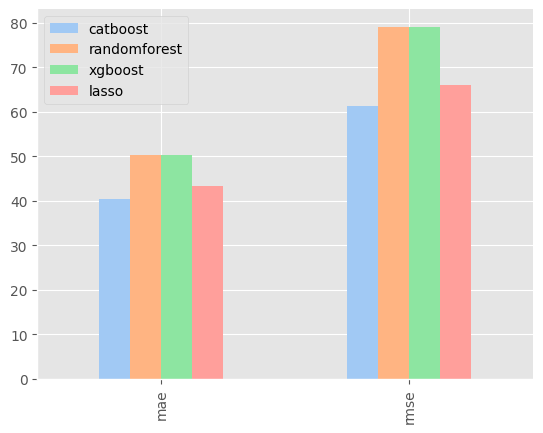

In [77]:
error_rec = {
    "catboost": {
        "mae": 40.31282314859388,
        "rmse": 61.2069236302688,
    },
    "randomforest": {
        "mae": 50.1839889322522,
        "rmse": 79.12972350643851,
    },
    "xgboost": {
         "mae": 50.1839889322522,
        "rmse": 79.12972350643851,
    },
    "lasso": {
         "mae": 43.26164501092259,
        "rmse": 66.08328222674918,
    },
}
pd.DataFrame(error_rec).plot(kind="bar", 
             color=[
                 sns.color_palette("pastel")[0], 
                 sns.color_palette("pastel")[1], 
                 sns.color_palette("pastel")[2], 
                 sns.color_palette("pastel")[3]]);

# <span style="font-family:cursive;text-align:center">Hyperparameter Tuning</span>

### <span style="font-family:cursive;text-align:center">Using CrossValidation on CatBoost</span>

In [78]:
# prepaere the out of folds predictions 
train_oof = np.zeros((train.shape[0],))
test_preds = np.zeros(test.shape[0])

NUM_FOLDS = 5
kf = KFold(n_splits = NUM_FOLDS, shuffle=True, random_state=0)


for fold, (train_idx, test_idx) in tqdm.tqdm(enumerate(kf.split(train, target))):
    X_train, X_test = train.iloc[train_idx][test.columns], train.iloc[test_idx][test.columns]
    y_train, y_test = target[train_idx], target[test_idx]
    
    catb = CatBoostRegressor(iterations=500,
                         learning_rate=0.02,
                         depth=12,
                         eval_metric='RMSE',
#                         early_stopping_rounds=42,
                         random_seed = 23,
                         bagging_temperature = 0.2,
                         od_type='Iter',
                         metric_period = 75,
                         od_wait=100)
    # train model
    catb.fit(X_train, y_train,
                 eval_set=(X_test,y_test),
                 cat_features=cats_discrete_idx,
                 use_best_model=True,
                 verbose=True)

    oof = catb.predict(X_test)
    train_oof[test_idx] = oof
    test_preds += catb.predict(test)/NUM_FOLDS      
    print(f"out-of-folds prdiction ==== fold_{fold} RMSE",np.sqrt(mean_squared_error(oof, y_test, squared=False)))


0it [00:00, ?it/s]Warning: Overfitting detector is active, thus evaluation metric is calculated on every iteration. 'metric_period' is ignored for evaluation metric.


0:	learn: 58.0511088	test: 57.0156693	best: 57.0156693 (0)	total: 947ms	remaining: 7m 52s
75:	learn: 45.1909786	test: 45.1320454	best: 45.1320454 (75)	total: 45.6s	remaining: 4m 14s
150:	learn: 42.1517055	test: 43.2749433	best: 43.2749433 (150)	total: 1m 32s	remaining: 3m 33s
225:	learn: 40.7622737	test: 42.7169726	best: 42.7169726 (225)	total: 2m 19s	remaining: 2m 48s
300:	learn: 39.8017591	test: 42.4112474	best: 42.4112474 (300)	total: 3m 5s	remaining: 2m 2s
375:	learn: 39.0574286	test: 42.2485290	best: 42.2485290 (375)	total: 3m 49s	remaining: 1m 15s
450:	learn: 38.4358353	test: 42.1204368	best: 42.1198925 (446)	total: 4m 34s	remaining: 29.9s
499:	learn: 38.0201315	test: 42.0346401	best: 42.0346401 (499)	total: 5m 5s	remaining: 0us

bestTest = 42.03464011
bestIteration = 499



1it [05:06, 306.35s/it]

out-of-folds prdiction ==== fold_0 RMSE 6.483412688467715


0:	learn: 57.9618277	test: 57.4326045	best: 57.4326045 (0)	total: 513ms	remaining: 4m 15s
75:	learn: 45.1148563	test: 45.5384904	best: 45.5384904 (75)	total: 47.1s	remaining: 4m 22s
150:	learn: 42.2090683	test: 43.5430803	best: 43.5430803 (150)	total: 1m 33s	remaining: 3m 36s
225:	learn: 40.9152765	test: 42.9043186	best: 42.9043186 (225)	total: 2m 17s	remaining: 2m 47s
300:	learn: 40.0261755	test: 42.5593927	best: 42.5593927 (300)	total: 3m 3s	remaining: 2m 1s
375:	learn: 39.2590726	test: 42.3442149	best: 42.3442149 (375)	total: 4m 12s	remaining: 1m 23s
450:	learn: 38.5984145	test: 42.1889315	best: 42.1889315 (450)	total: 4m 58s	remaining: 32.5s
499:	learn: 38.2152177	test: 42.1128830	best: 42.1128830 (499)	total: 5m 31s	remaining: 0us

bestTest = 42.11288298
bestIteration = 499



2it [10:38, 321.64s/it]

out-of-folds prdiction ==== fold_1 RMSE 6.489443963737514


0:	learn: 57.6684210	test: 58.5884399	best: 58.5884399 (0)	total: 976ms	remaining: 8m 7s
75:	learn: 44.3738321	test: 47.3328000	best: 47.3328000 (75)	total: 53.1s	remaining: 4m 56s
150:	learn: 41.4239528	test: 45.7816134	best: 45.7816134 (150)	total: 1m 40s	remaining: 3m 53s
225:	learn: 40.0125935	test: 45.3580863	best: 45.3580863 (225)	total: 2m 34s	remaining: 3m 7s
300:	learn: 39.0535346	test: 45.1471649	best: 45.1471649 (300)	total: 3m 21s	remaining: 2m 13s
375:	learn: 38.3271338	test: 45.0707531	best: 45.0700091 (374)	total: 4m 9s	remaining: 1m 22s
450:	learn: 37.7053584	test: 44.9965119	best: 44.9965119 (450)	total: 4m 55s	remaining: 32.1s
499:	learn: 37.2906885	test: 44.9467586	best: 44.9467586 (499)	total: 5m 26s	remaining: 0us

bestTest = 44.94675859
bestIteration = 499



3it [16:06, 324.35s/it]

out-of-folds prdiction ==== fold_2 RMSE 6.7042343846758055


0:	learn: 58.4738287	test: 55.3705797	best: 55.3705797 (0)	total: 543ms	remaining: 4m 30s
75:	learn: 45.2318324	test: 43.7375162	best: 43.7375162 (75)	total: 47.7s	remaining: 4m 25s
150:	learn: 42.1658177	test: 42.2083307	best: 42.2083307 (150)	total: 1m 33s	remaining: 3m 36s
225:	learn: 40.7526916	test: 41.8661172	best: 41.8661172 (225)	total: 2m 20s	remaining: 2m 49s
300:	learn: 39.8346487	test: 41.7344693	best: 41.7344693 (300)	total: 3m 7s	remaining: 2m 3s
375:	learn: 39.1065975	test: 41.6719369	best: 41.6719369 (375)	total: 3m 53s	remaining: 1m 17s
450:	learn: 38.5377653	test: 41.6391462	best: 41.6358942 (449)	total: 4m 41s	remaining: 30.5s
499:	learn: 38.1100580	test: 41.5843776	best: 41.5838284 (496)	total: 5m 11s	remaining: 0us

bestTest = 41.5838284
bestIteration = 496

Shrink model to first 497 iterations.


4it [21:18, 319.75s/it]

out-of-folds prdiction ==== fold_3 RMSE 6.448552427527569


0:	learn: 57.0899815	test: 60.8246576	best: 60.8246576 (0)	total: 548ms	remaining: 4m 33s
75:	learn: 44.3052922	test: 48.6257520	best: 48.6257520 (75)	total: 48.4s	remaining: 4m 30s
150:	learn: 41.4857459	test: 46.6010160	best: 46.6010160 (150)	total: 1m 34s	remaining: 3m 38s
225:	learn: 40.1998321	test: 45.9004803	best: 45.9004803 (225)	total: 2m 20s	remaining: 2m 50s
300:	learn: 39.3070425	test: 45.5567115	best: 45.5567115 (300)	total: 3m 7s	remaining: 2m 4s
375:	learn: 38.6516235	test: 45.3705993	best: 45.3705993 (375)	total: 3m 54s	remaining: 1m 17s
450:	learn: 38.0821313	test: 45.2545228	best: 45.2545228 (450)	total: 4m 42s	remaining: 30.7s
499:	learn: 37.7068159	test: 45.2117085	best: 45.2117085 (499)	total: 5m 13s	remaining: 0us

bestTest = 45.21170854
bestIteration = 499



5it [26:33, 318.62s/it]

out-of-folds prdiction ==== fold_4 RMSE 6.7239652316201735


### <span style="font-family:cursive;text-align:center">Using Optuna with Random Forest</span> 

In [79]:
# cross validating training data
kfolds = KFold(n_splits=3, shuffle=True, random_state=42)

# Objective function
def random_forest_objective(trial, data=X_train, target=y_train):
    # Dictionary to store best parameters
    param = {
        "n_estimators": trial.suggest_int("n_estimators", 100, 500),
        "max_depth": trial.suggest_int("max_depth", 5, 20),
        "min_samples_split": trial.suggest_int("min_samples_split", 2, 10),
        "max_features": trial.suggest_float("max_features", 0.01, 0.95)
    }
     
    model = RandomForestRegressor(**param)
    
    # Setting random seed and kfolds for cross-validation
    kfolds = KFold(n_splits=10, shuffle=True, random_state=42)
    
    scores = cross_val_score(model, data, target, cv=kfolds, scoring="neg_root_mean_squared_error")
    return scores.mean()



In [80]:
def tuner(objective, n=5, direction='minimize'): 
    # Create Study object
    study = optuna.create_study(direction="minimize")

    # Optimize the study
    study.optimize(objective, n_trials=n)

    # Print the result
    best_params = study.best_params
    best_score = study.best_value
    print(f"Best score: {best_score}")
    print(f"Optimized parameters: {best_params}\n")
    print("<<<<<<<<<< Tuning complete... >>>>>>>>>>")
    
    # Return best parameters for the model
    return best_params, best_score

In [81]:
%%time
rf_param, rf_score = tuner(random_forest_objective,1)
rf_tuned_model = RandomForestRegressor(**rf_param)

[I 2023-05-02 12:03:40,522] A new study created in memory with name: no-name-f94a0ac2-2f32-4851-af1a-1165fb1fe6ec
[I 2023-05-02 12:32:55,236] Trial 0 finished with value: -42.11841770022158 and parameters: {'n_estimators': 229, 'max_depth': 15, 'min_samples_split': 5, 'max_features': 0.7198157511716005}. Best is trial 0 with value: -42.11841770022158.


Best score: -42.11841770022158
Optimized parameters: {'n_estimators': 229, 'max_depth': 15, 'min_samples_split': 5, 'max_features': 0.7198157511716005}

<<<<<<<<<< Tuning complete... >>>>>>>>>>
CPU times: user 29min 3s, sys: 2.38 s, total: 29min 5s
Wall time: 29min 14s


In [82]:
rf_tuned_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=15, max_features=0.7198157511716005,
                      min_samples_split=5, n_estimators=229)

### <span style="font-family:cursive;text-align:center">Final Evaluation</span>

Text(0.5, 0, 'iteration')

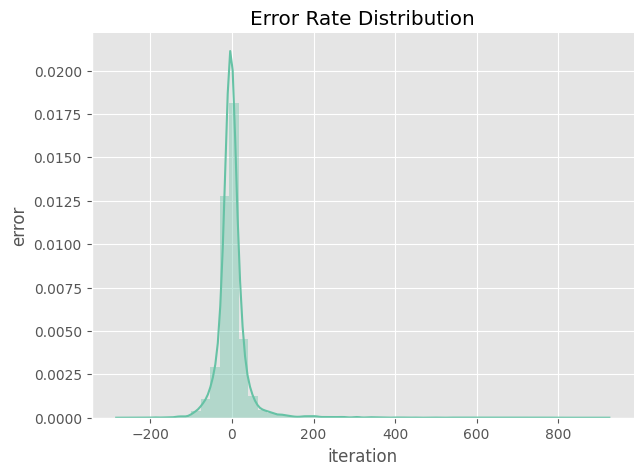

In [83]:
y_hat_tuned = catb.predict(X_test)

plt.figure(figsize = (7,5))
sns.distplot(y_test - y_hat_tuned)
plt.title("Error Rate Distribution");
plt.ylabel("error")
plt.xlabel("iteration")

Text(0.5, 0, 'iteration')

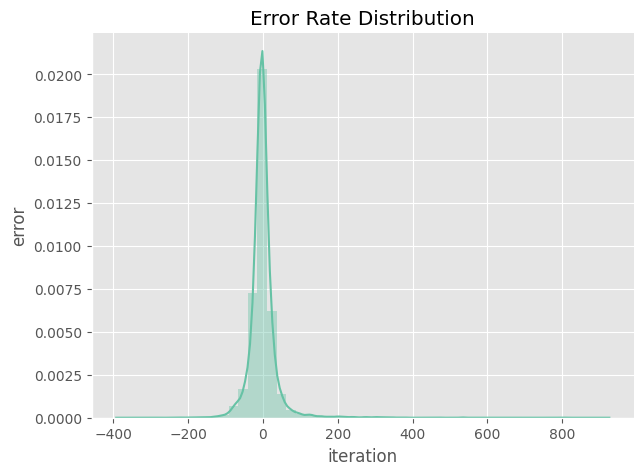

In [84]:
y_hat_tuned = rf_tuned_model.predict(X_test)

plt.figure(figsize = (7,5))
sns.distplot(y_test - y_hat_tuned)
plt.title("Error Rate Distribution");
plt.ylabel("error")
plt.xlabel("iteration")

### <span style="font-family:cursive;text-align:center">Saving Models</span> 

In [85]:
with open('rf_tuned_final.joblib', 'wb') as f:
    joblib.dump(rf_tuned_model, f, compress=1)

with open('catb_best_final.joblib', 'wb') as f:
    joblib.dump(catb,f,compress=3)

In [86]:
## Load models here
load = False
if load:
    with open('rf_tuned_final.joblib', 'rb') as f:
        rf = joblib.load(f)

    with open('catb_best_final.joblib', 'rb') as f:
        catb = joblib.load(f)

# <span style="font-family:cursive;text-align:center">Explainable AI</span>

<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;"> 

we will extract new weather statistics from the building location weather featurespick your sample to study the model upon

In [87]:
size = 2000

sample_exists = False

if sample_exists:
    sample_set = pd.read_csv('data/shap/sample2000.csv')
else:
    sample_set = X_test.sample(size)
sample_set

Year_Factor  floor_area  year_built  energy_star_rating  ELEVATION  \
69575          4.0    316890.0      1948.0           73.000000        3.4   
21108          6.0    657140.0      1999.0           66.000000      198.1   
36042          1.0     53750.0      1900.0           63.142857        3.4   
64886          6.0    162450.0      1924.0           96.000000       42.7   
2292           5.0     18407.0      1923.0           89.000000        9.1   
...            ...         ...         ...                 ...        ...   
41081          6.0     58740.0      1938.0           35.000000       25.0   
49216          6.0     73909.0      1925.0           44.000000       42.7   
56315          5.0     97175.0      2010.0          100.000000       15.2   
1344           5.0     16826.0      1959.0           94.000000        9.1   
42842          6.0     61717.0      1900.0           50.571429        3.4   

       january_min_temp  january_avg_temp  january_max_temp  \
69575               4.0         28.596774              58.0   
21108              -2.0         25.166667              50.0   
36042               6.0         29.677419              53.0   
64886              11.0         34.451613              59.0   
2292               29.0         51.387097              77.0   
...                 ...               ...               ...   
41081              11.0         34.451613              59.0   
49216              11.0         34.451613              59.0   
56315               8.0         29.854839              56.0   
1344               29.0         51.387097              77.0   
42842              11.0         34.451613              59.0   

       february_min_temp  february_avg_temp  february_max_temp  \
69575                9.0          31.625000               56.0   
21108                2.0          29.711538               65.0   
36042               15.0          36.035714               67.0   
64886               -1.0          37.706897               61.0   
2292                36.0          56.803571               75.0   
...                  ...                ...                ...   
41081               -1.0          37.706897               61.0   
49216               -1.0          37.706897               61.0   
56315                2.0          23.946429               43.0   
1344                36.0          56.803571               75.0   
42842               -1.0          37.706897               61.0   

       march_min_temp  march_avg_temp  march_max_temp  april_min_temp  \
69575            13.0       37.661290            66.0            31.0   
21108            12.0       44.516129            73.0            23.0   
36042            20.0       42.322581            77.0            35.0   
64886            26.0       48.870968            79.0            26.0   
2292             40.0       61.435484            85.0            41.0   
...               ...             ...             ...             ...   
41081            26.0       48.870968            79.0            26.0   
49216            26.0       48.870968            79.0            26.0   
56315            12.0       38.096774            62.0            32.0   
1344             40.0       61.435484            85.0            41.0   
42842            26.0       48.870968            79.0            26.0   

       april_avg_temp  april_max_temp  may_min_temp  may_avg_temp  \
69575       52.333333            77.0          49.0     64.000000   
21108       49.017241            88.0          38.0     61.933333   
36042       54.300000            83.0          46.0     64.483871   
64886       53.333333            82.0          43.0     62.790323   
2292        60.966667            91.0          45.0     62.887097   
...               ...             ...           ...           ...   
41081       53.333333            82.0          43.0     62.790323   
49216       53.333333            82.0          43.0     62.790323   
56315       54.250000            8

<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;"> calculate shap values

In [88]:
is_saved = False

if is_saved:
    with open('data/shap/shap_values_sample2000.pkl', 'rb') as f:
        shap_values = joblib.load(f)
else:
    shap_values = shap.TreeExplainer(rf).shap_values(sample_set)

In [89]:
shap.initjs()

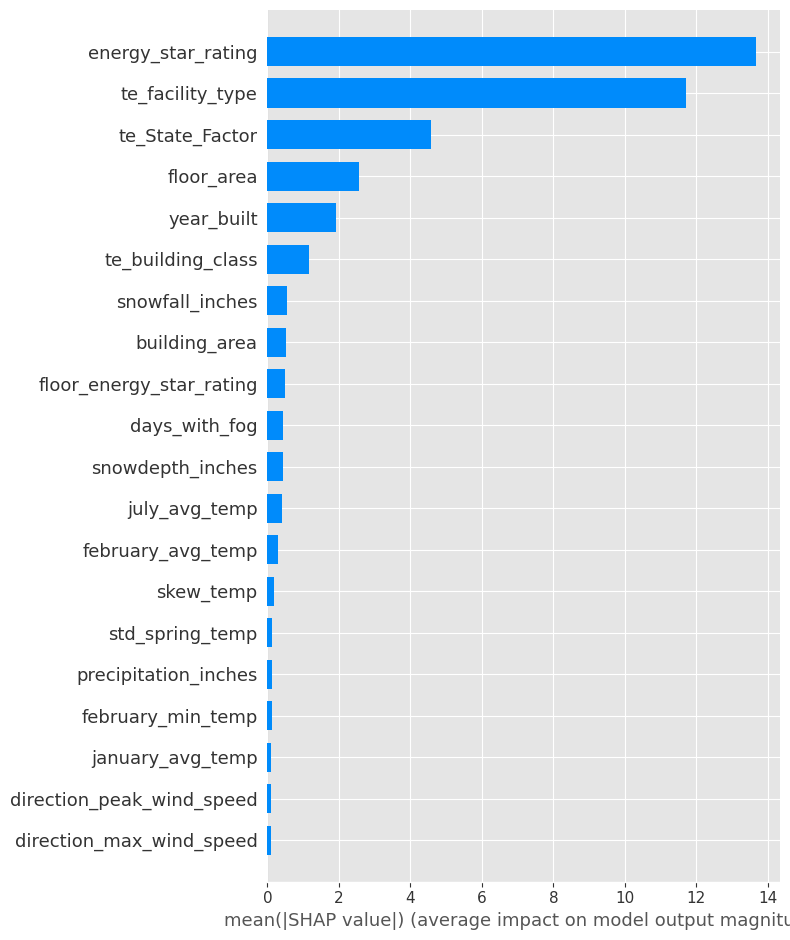

In [90]:
shap.summary_plot(shap_values, sample_set, plot_type="bar")

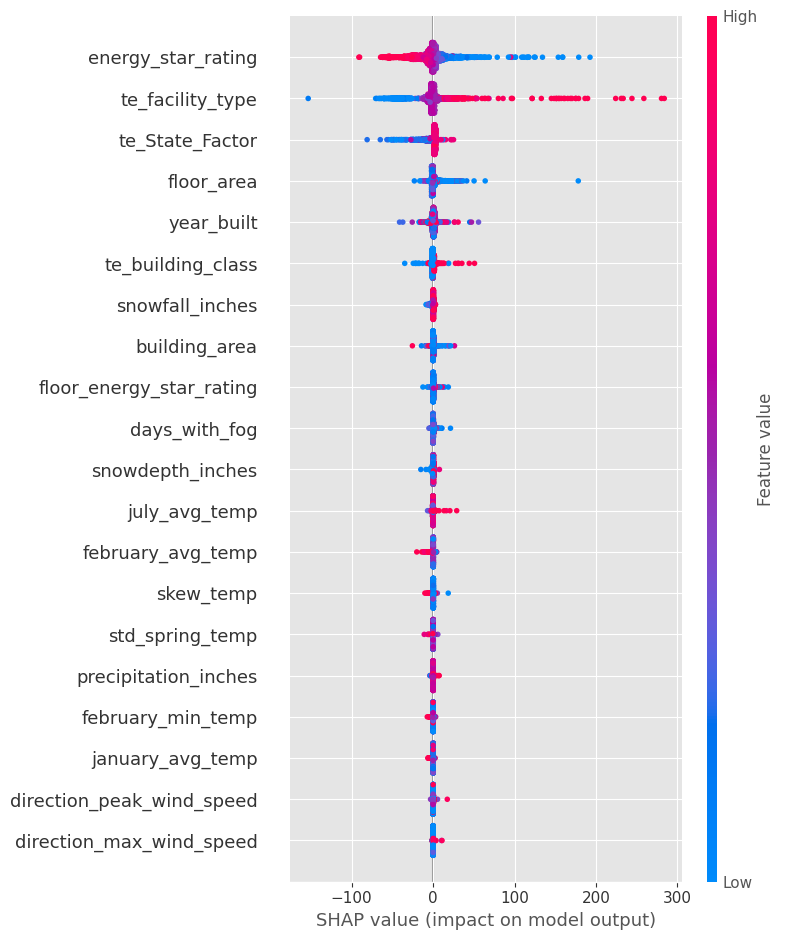

In [91]:
shap.summary_plot(shap_values, sample_set)

In [92]:
limit = 200
shap.force_plot(shap.TreeExplainer(rf_tuned_model).expected_value[0], shap_values[0:limit,:], sample_set.iloc[0:limit,:])

In [93]:
row = 60
print(y_pred[row])
shap.initjs()
shap.force_plot(shap.TreeExplainer(rf_tuned_model).expected_value[0], shap_values[row], sample_set.iloc[row])

111.60976575180581


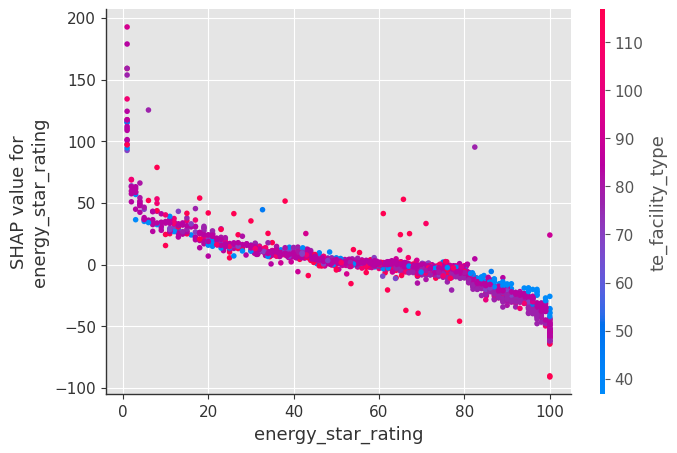

In [94]:
shap.dependence_plot('energy_star_rating', shap_values, sample_set)

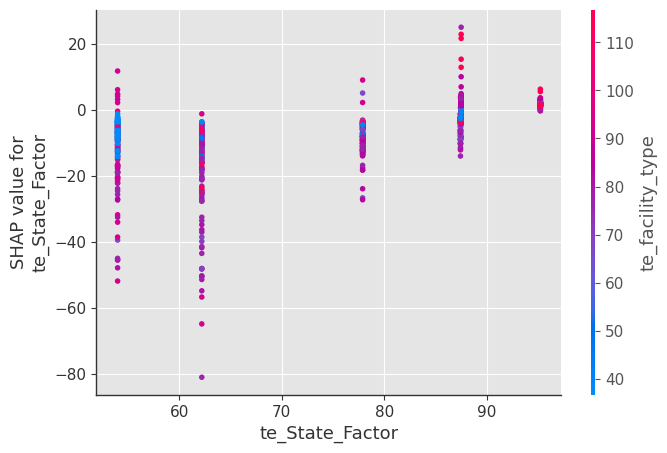

In [95]:
shap.dependence_plot('te_State_Factor', shap_values, sample_set)

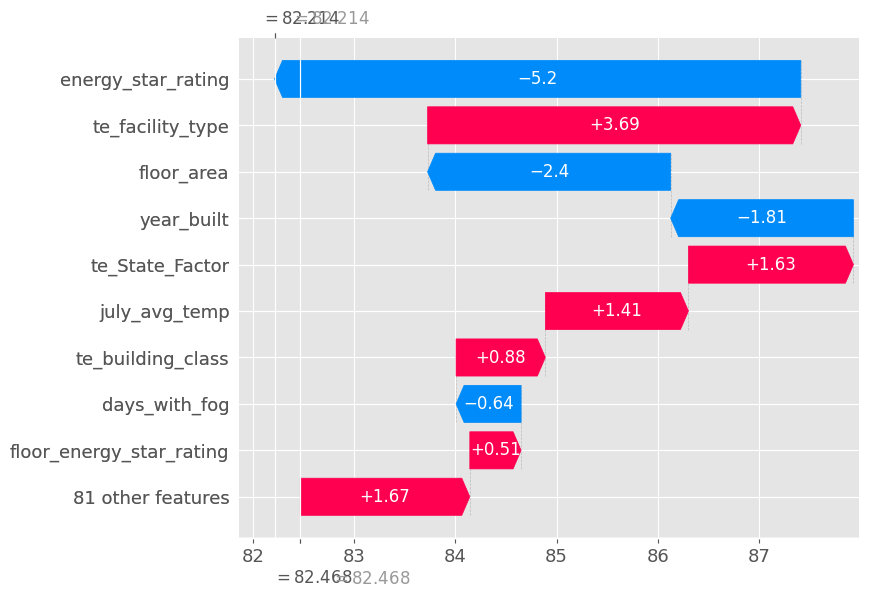

In [96]:
row = 111
shap.plots._waterfall.waterfall_legacy(shap.TreeExplainer(rf_tuned_model).expected_value[0], 
                                       shap_values[row],
                                       feature_names=sample_set.columns.tolist()
                                      )

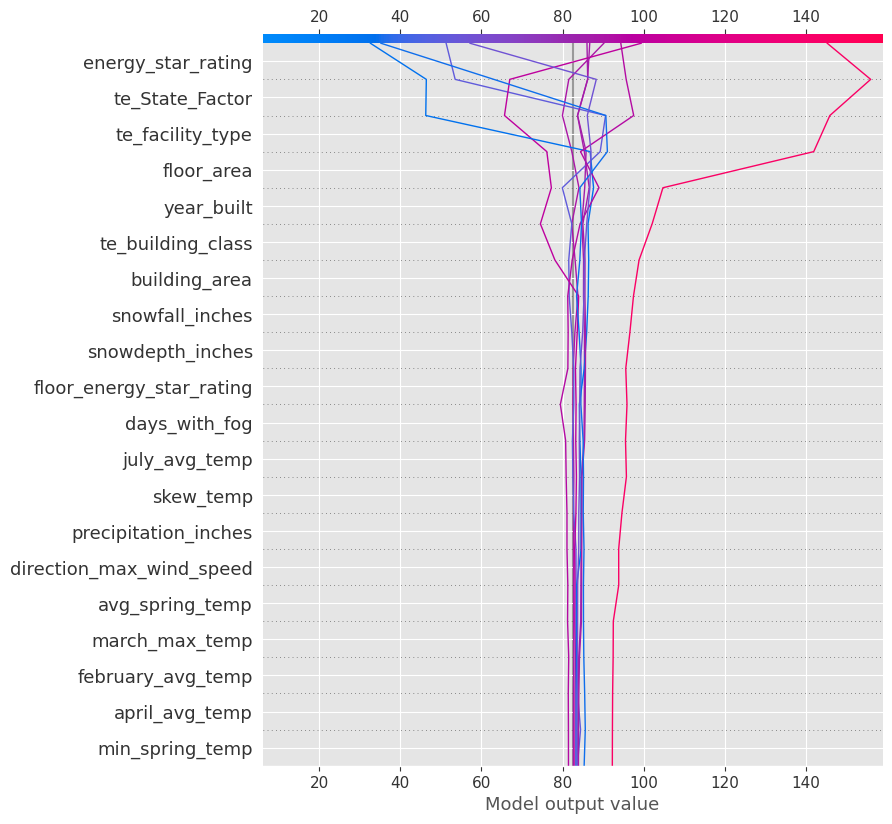

In [97]:
start = 120
limit = 130

shap.decision_plot(shap.TreeExplainer(rf_tuned_model).expected_value[0], 
                   shap_values[start:limit], 
                   feature_names=sample_set.columns.tolist())

 98%|===================| 488/500 [00:43<00:01]       

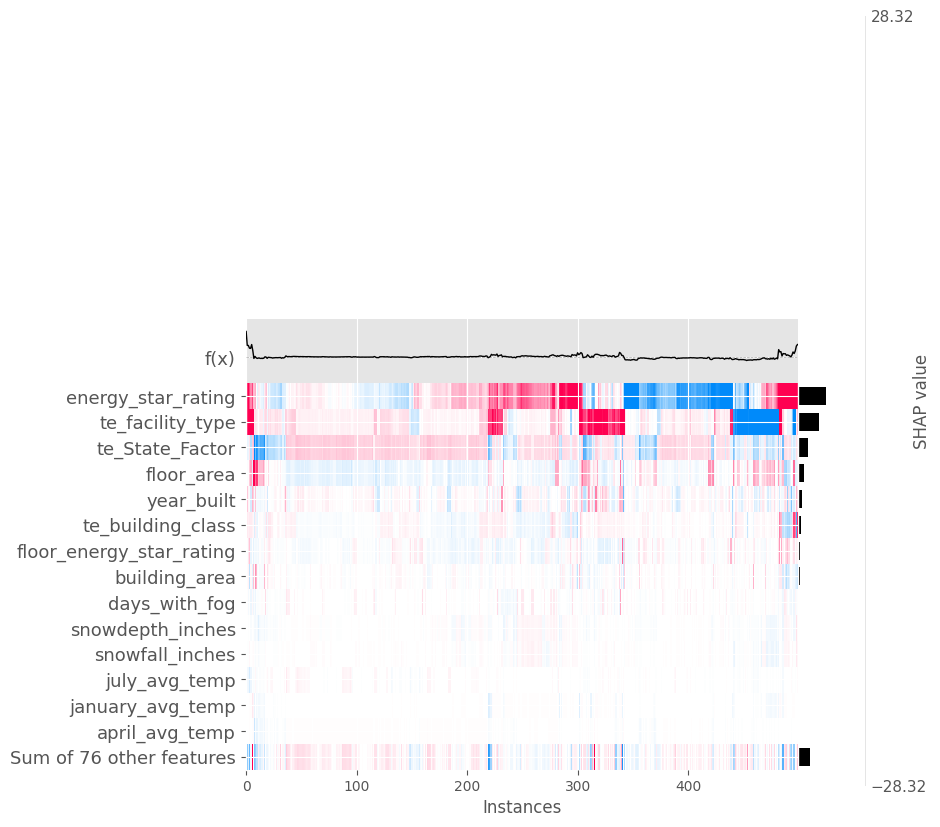

In [98]:
limit = 500
shap.plots.heatmap(shap.TreeExplainer(rf_tuned_model, data=sample_set)(sample_set[:limit]), max_display=15)